# **Problem Statement:**

The objective of this regression project is to analyze the Medical Cost Dataset, which contains comprehensive information about medical costs and healthcare expenses. The primary goal is to develop a predictive model that can accurately estimate medical charges based on various factors and attributes present in the dataset. By doing so, we aim to address the following key questions and challenges within the healthcare industry:

1. Cost Estimation:
   - How can we effectively estimate medical charges for patients based on their unique characteristics, such as age, gender, BMI, smoking status, region, and other relevant attributes?

2. Factors Influencing Costs:
   - What are the primary factors and variables that significantly influence medical expenses? Which factors have the most substantial impact on healthcare costs?

3. Regional Disparities:
   - Are there regional disparities in medical costs? Do certain geographic areas exhibit higher or lower healthcare expenses, and if so, what are the contributing factors?

4. Insurance Coverage:
   - How does the presence or absence of health insurance coverage affect medical charges? Can we identify patterns in cost variations related to insurance status?

5. Lifestyle Choices:
   - To what extent do lifestyle choices, such as smoking habits and BMI, impact medical costs? Can we quantify the additional expenses associated with specific lifestyle factors?

6. Pre-existing Conditions:
   - Are individuals with pre-existing medical conditions more likely to incur higher healthcare expenses? Can we predict the added costs associated with particular health conditions?

7. Model Accuracy:
   - What is the accuracy of the developed regression model in predicting medical charges? How well does it perform in comparison to existing methods or benchmarks?

By addressing these questions, we aim to provide valuable insights for healthcare professionals, policymakers, and analysts to make informed decisions regarding resource allocation, healthcare planning, and cost containment strategies. Additionally, this project seeks to enhance our understanding of the intricate dynamics within the healthcare industry and contribute to more equitable and cost-effective healthcare solutions.

Data Link: https://www.kaggle.com/datasets/nanditapore/medical-cost-dataset?resource=download

## **Data Collection:**

In [245]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [15,9]
sns.set(rc={'figure.figsize':(15,9)})

In [246]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
# Loading the dataset
medical_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StarBucks/Medical Charges Prediction/medical_cost.csv')

# Display the top 5 rows
medical_df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [248]:
# Display the last 5 rows
medical_df.tail()

,Id,age,sex,bmi,children,smoker,region,charges
1333,1334,50,male,30.97,3,no,northwest,10600.5483
1334,1335,18,female,31.92,0,no,northeast,2205.9808
1335,1336,18,female,36.85,0,no,southeast,1629.8335
1336,1337,21,female,25.80,0,no,southwest,2007.9450
1337,1338,61,female,29.07,0,yes,northwest,29141.3603


In [249]:
# Number of records in the data
len(medical_df)

1338

In [250]:
# Shape of the dataset
medical_df.shape

(1338, 8)

In [251]:
# Columns in the dataset
medical_df.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [252]:
# Check the datatypes
medical_df.dtypes

Id            int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

* There are 1338 observations in the dataset with 8 columns present which is a fairly small and simple dataset.
* Most of the columns contain numeric values apart from few which we might need to encode.
* Our goal is to predict the charges which is our target variable here.

### **Data Summary:**

**Categorical Features:**

- Sex: Determines the gender of the patient(Female/Male).
- Smoker: Whether the patient smokes or not(Yes/No).
- Region: From where the patient belongs.

**Numerical Features:**

- Id: Unique ID given for each observation.
- Age: Determines the age of the patient.
- BMI: Determines the body mass index of the patient.
- Children: Whether the patient has any children or not,if yes how many.
- Charges: Cost required for treatment which is our target variable to predict.

### **Information/Description of the Dataset:**

In [253]:
# Summary statistics of the dataset
medical_df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [254]:
# Check for null values in the dataset
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [255]:
# Check for missing values
medical_df.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* As the data is a very simple one we do not have any missing or null values so no need of handling or imputing them.

## **Exploratory Data Analysis:**

Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques.

The main purpose of EDA is to detect any errors, outliers as well as to understand different patterns in the data. It allows Analysts to understand the data better before making any assumptions.

We will be doing some univariate, bivariate and multivariate analysis to discover some insights from the data like:

  * Distribution of age, children, bmi, charges.
  * Distribution of gender, smoker, region.
  * How charges are related to the other variables in the dataset etc.

### **Distribution of Charges:**

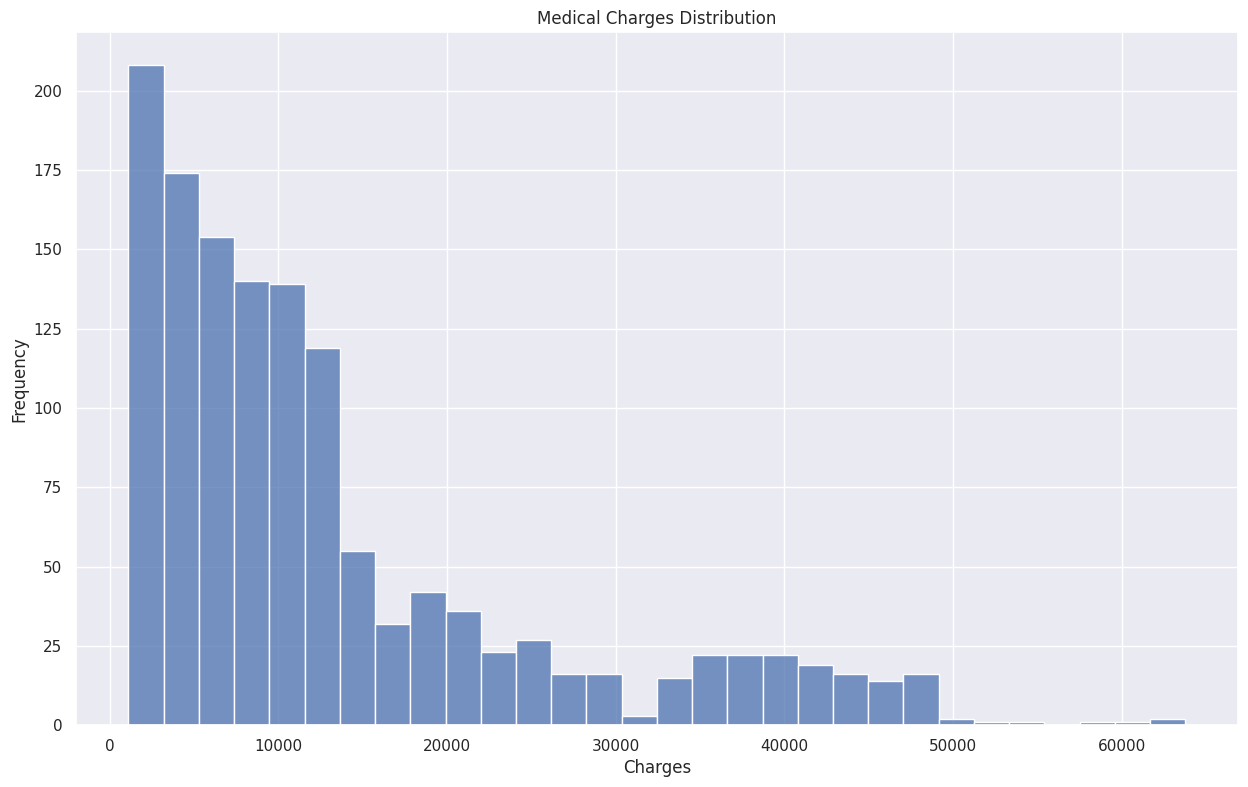

In [256]:
# Distribution of charges
sns.histplot(medical_df['charges'])
plt.title("Medical Charges Distribution")
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

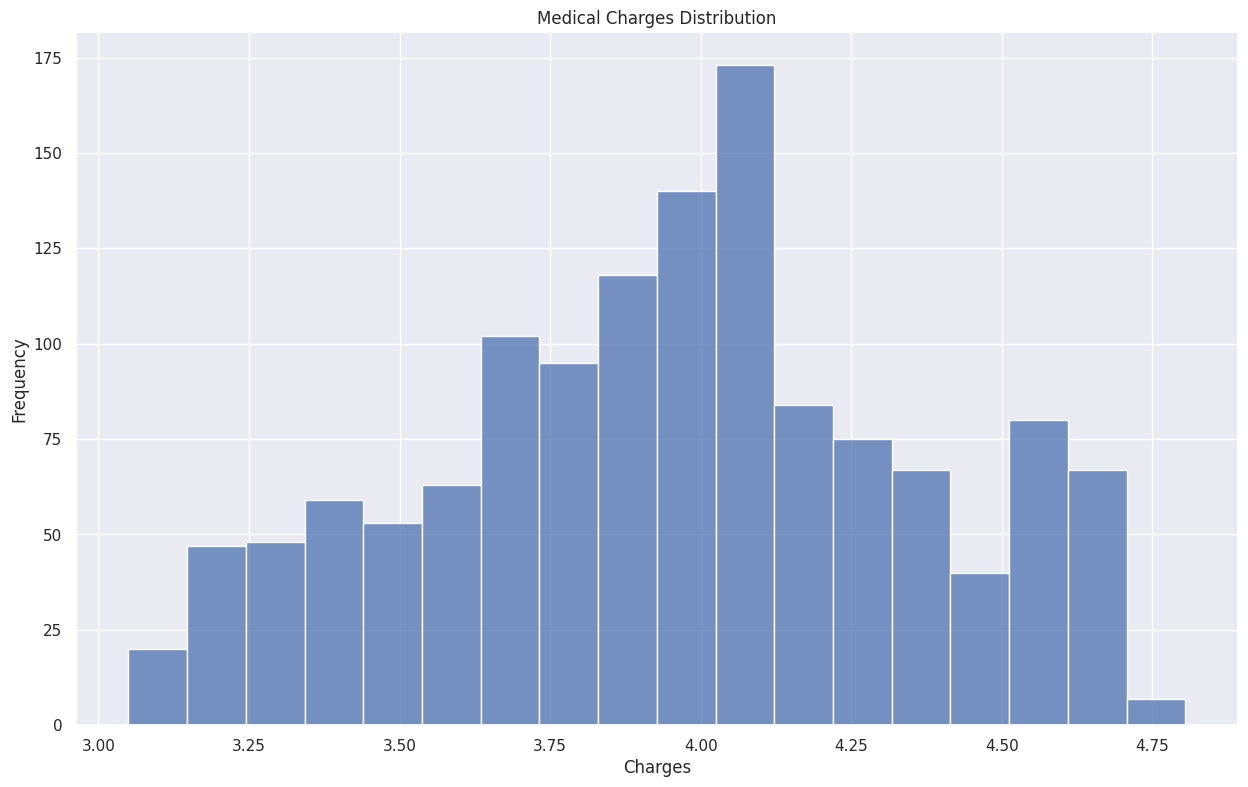

In [257]:


# Distribution of charges
sns.histplot(np.log10(medical_df['charges']))
plt.title("Medical Charges Distribution")
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

* We can infer from the plot that most of the patients have been charged under 10k but there are very few patients for whom the charges have gone upto 60k.
* The distribution is very much skewed to the right.

### **Outlier detection in Charges:**

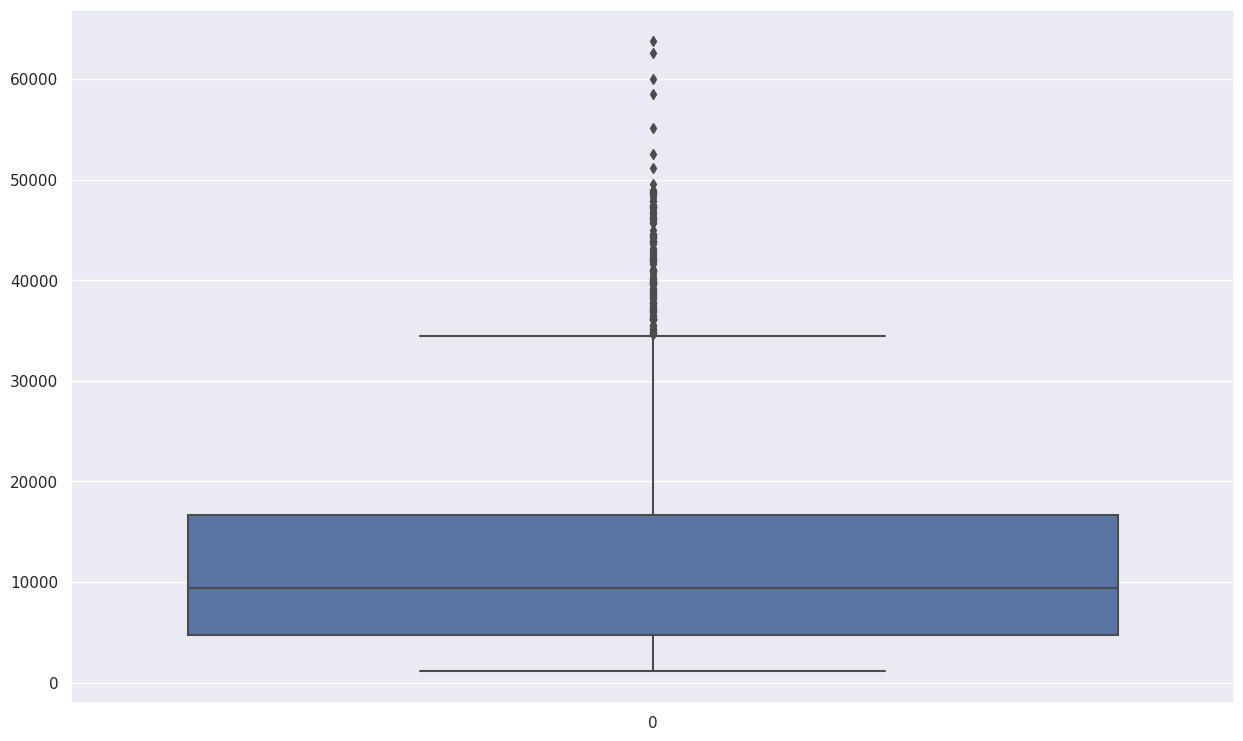

In [258]:
# Boxplots for outlier detection
sns.boxplot(medical_df['charges'])
plt.show()

* We can infer from the plot that anything above 35k is an outlier for this data.
* But we cannot remove or drop these values as in healthcare data there will be a very few observations with higher amount of charges which might be due to some rare disease or so and these numbers will be always very less in any kind of dataset. Thus we cannot treat them as outliers just by inference from a boxplot.

### **Distribution of Age:**

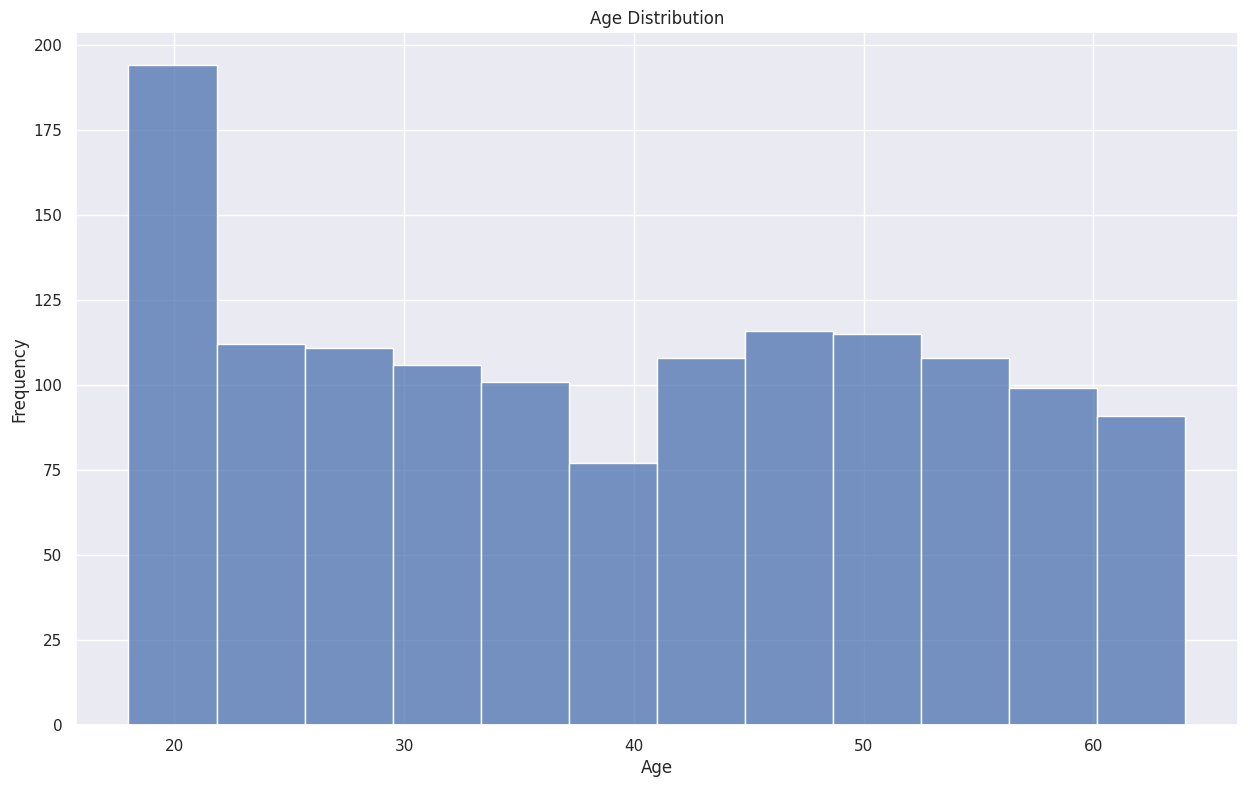

In [259]:
# Distribution of age
sns.histplot(medical_df['age'])
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* Surprisingly, most of the observants or patients in our dataset are young around the age of 20.
* Follows an uniform distribution for the ages above 25 or so till 60.

### **Distribution of BMI:**

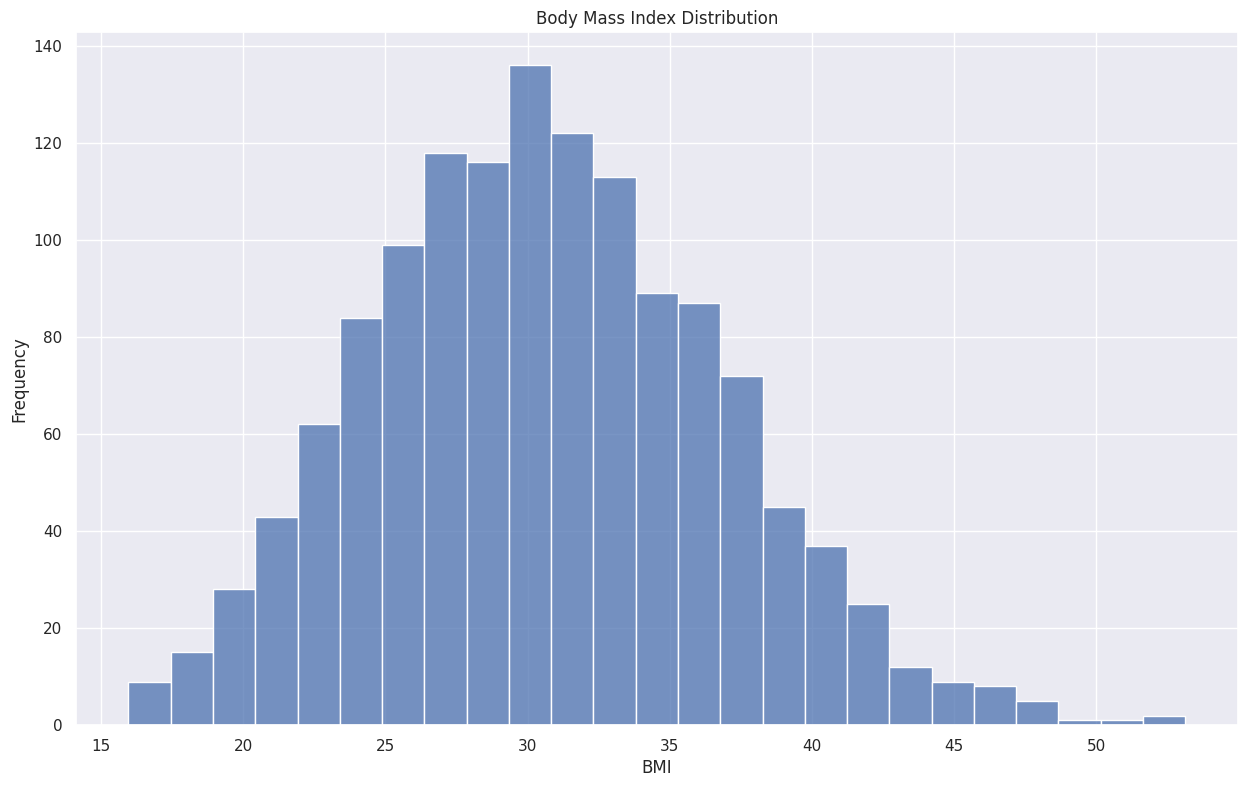

In [260]:
# Distribution of bmi
sns.histplot(medical_df['bmi'])
plt.title("Body Mass Index Distribution")
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

* The distribution of BMI follows a normal distribution where most of the data lies around 25 to 35 BMI.

### **Distribution of Sex:**

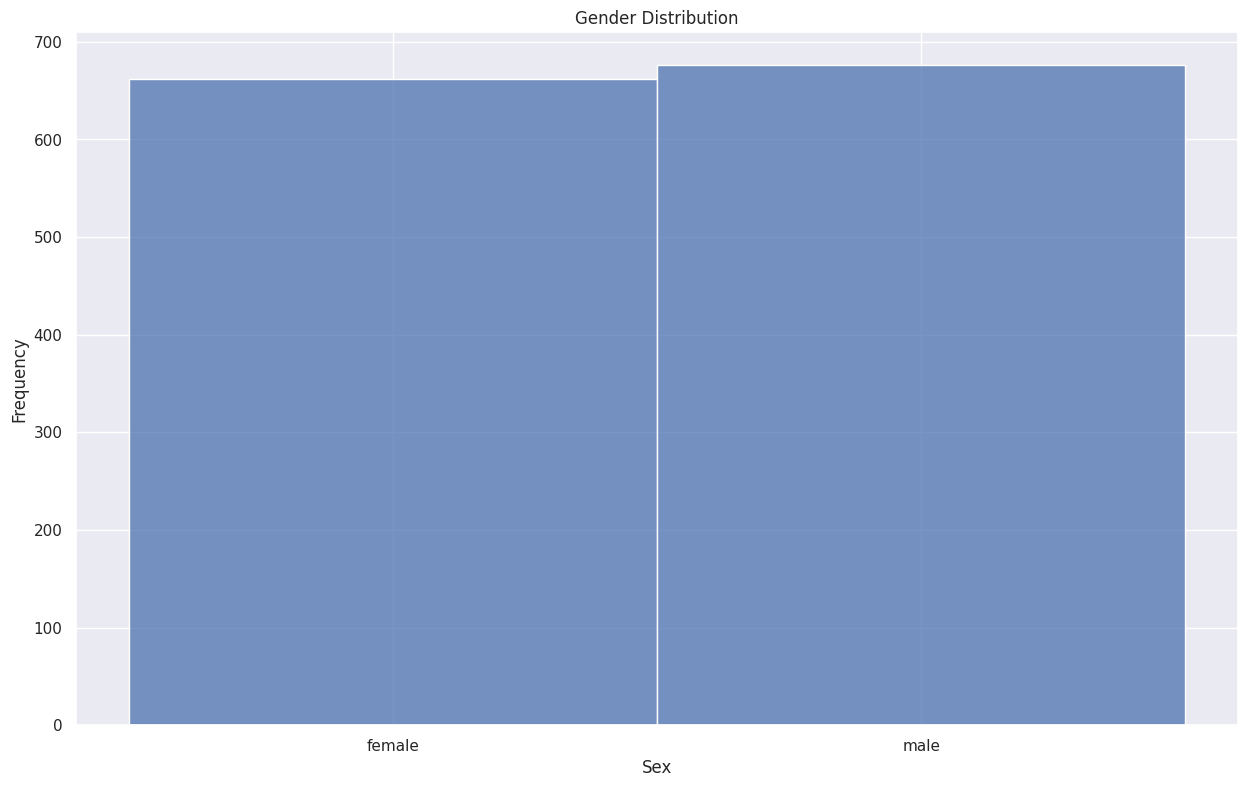

In [261]:
# Distribution of gender
sns.histplot(medical_df['sex'])
plt.title("Gender Distribution")
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

* We can infer from the plot that there is almost an equal distribution of male and female patients in our dataset.

### **Distribution of Children:**

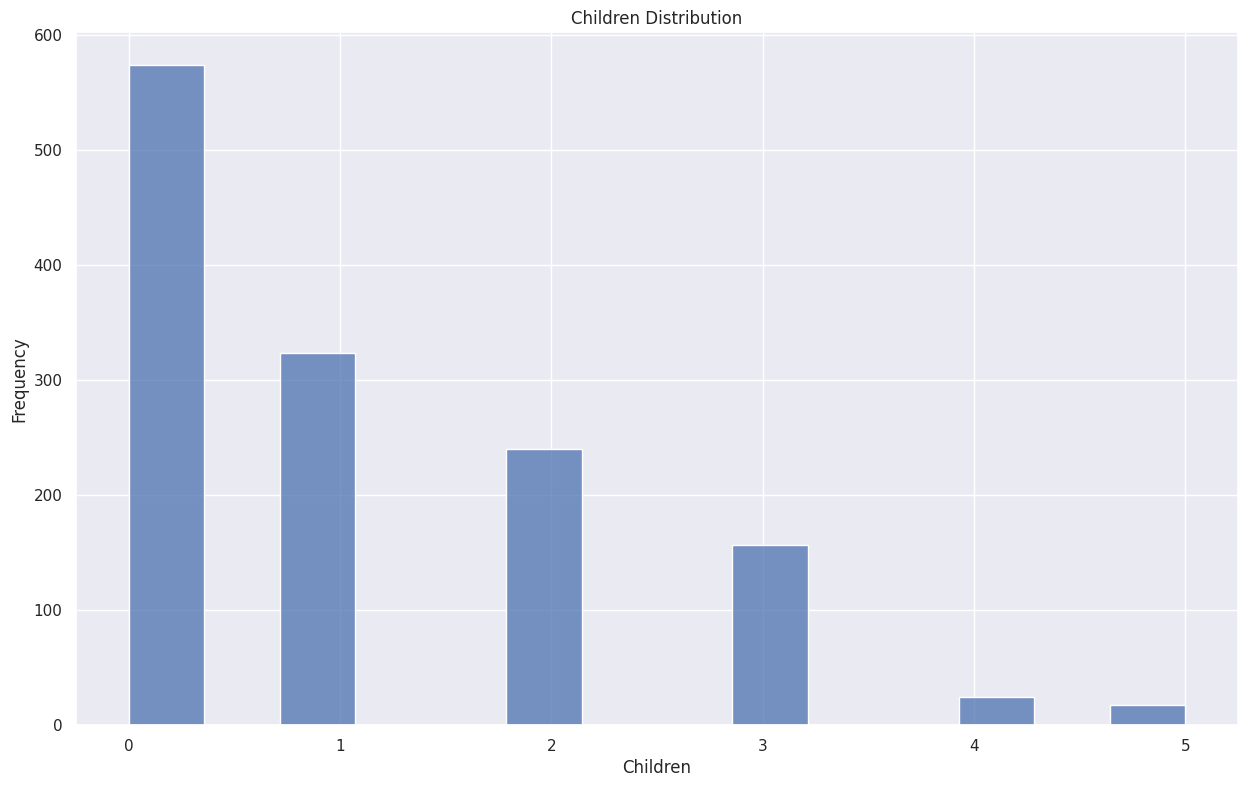

In [262]:
# Distribution of children
sns.histplot(medical_df['children'])
plt.title("Children Distribution")
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.show()

* Most of the patients have no children or 1 child and there are very few who have 4-5 children.

### **Distribution of Smoking:**

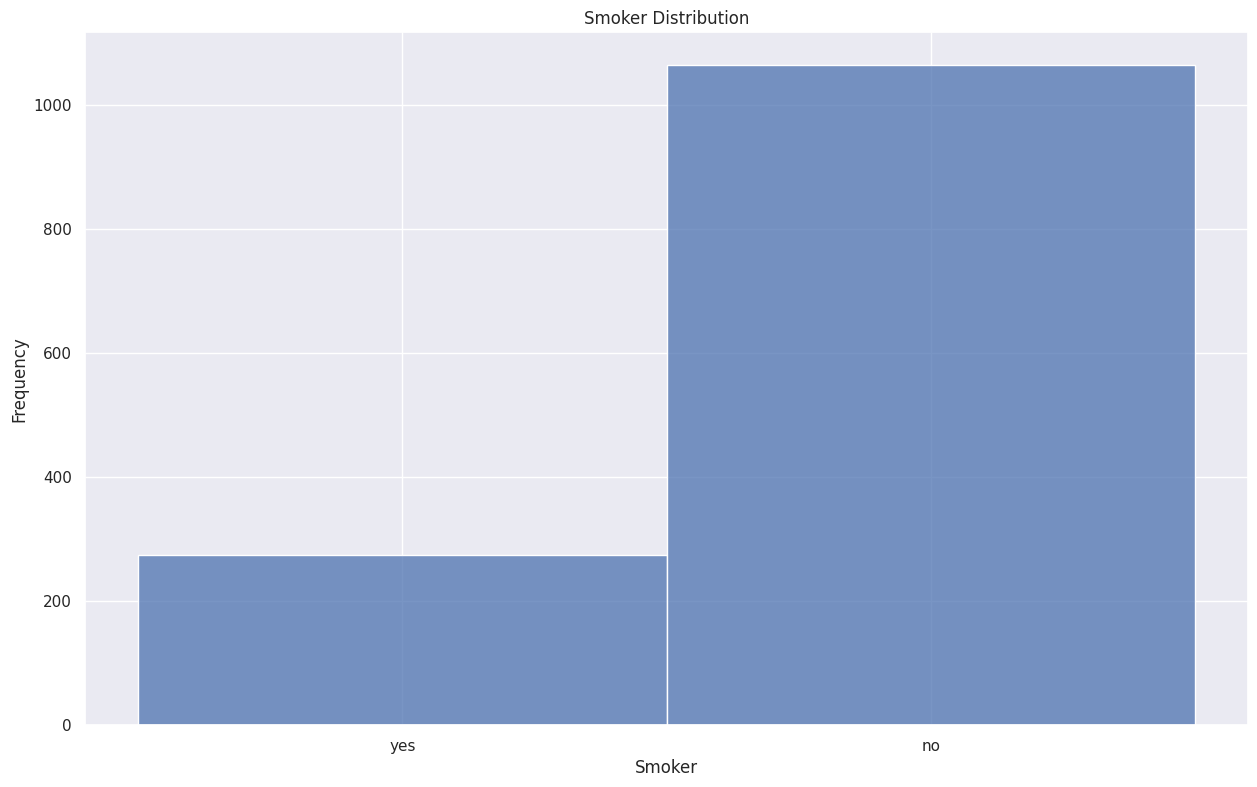

In [263]:
# Distribution of smoker
sns.histplot(medical_df['smoker'])
plt.title("Smoker Distribution")
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.show()

* Most of the patients in our dataset are non smokers.

### **Distribution of Regions:**

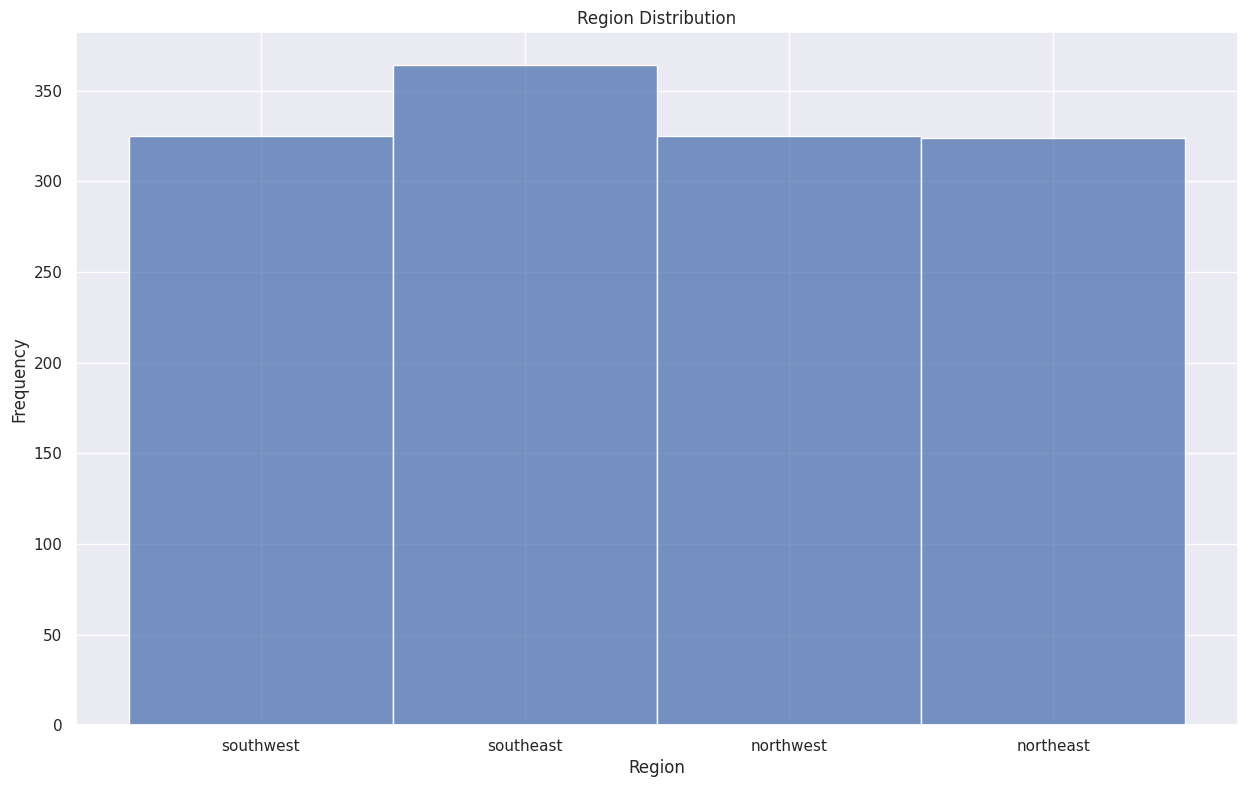

In [264]:
# Distribution of region
sns.histplot(medical_df['region'])
plt.title("Region Distribution")
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

* The regions are almost equally distributed in the dataset where only southeast has a couple more observations than other regions.

### **How charges vary with the numerical features in the dataset:**

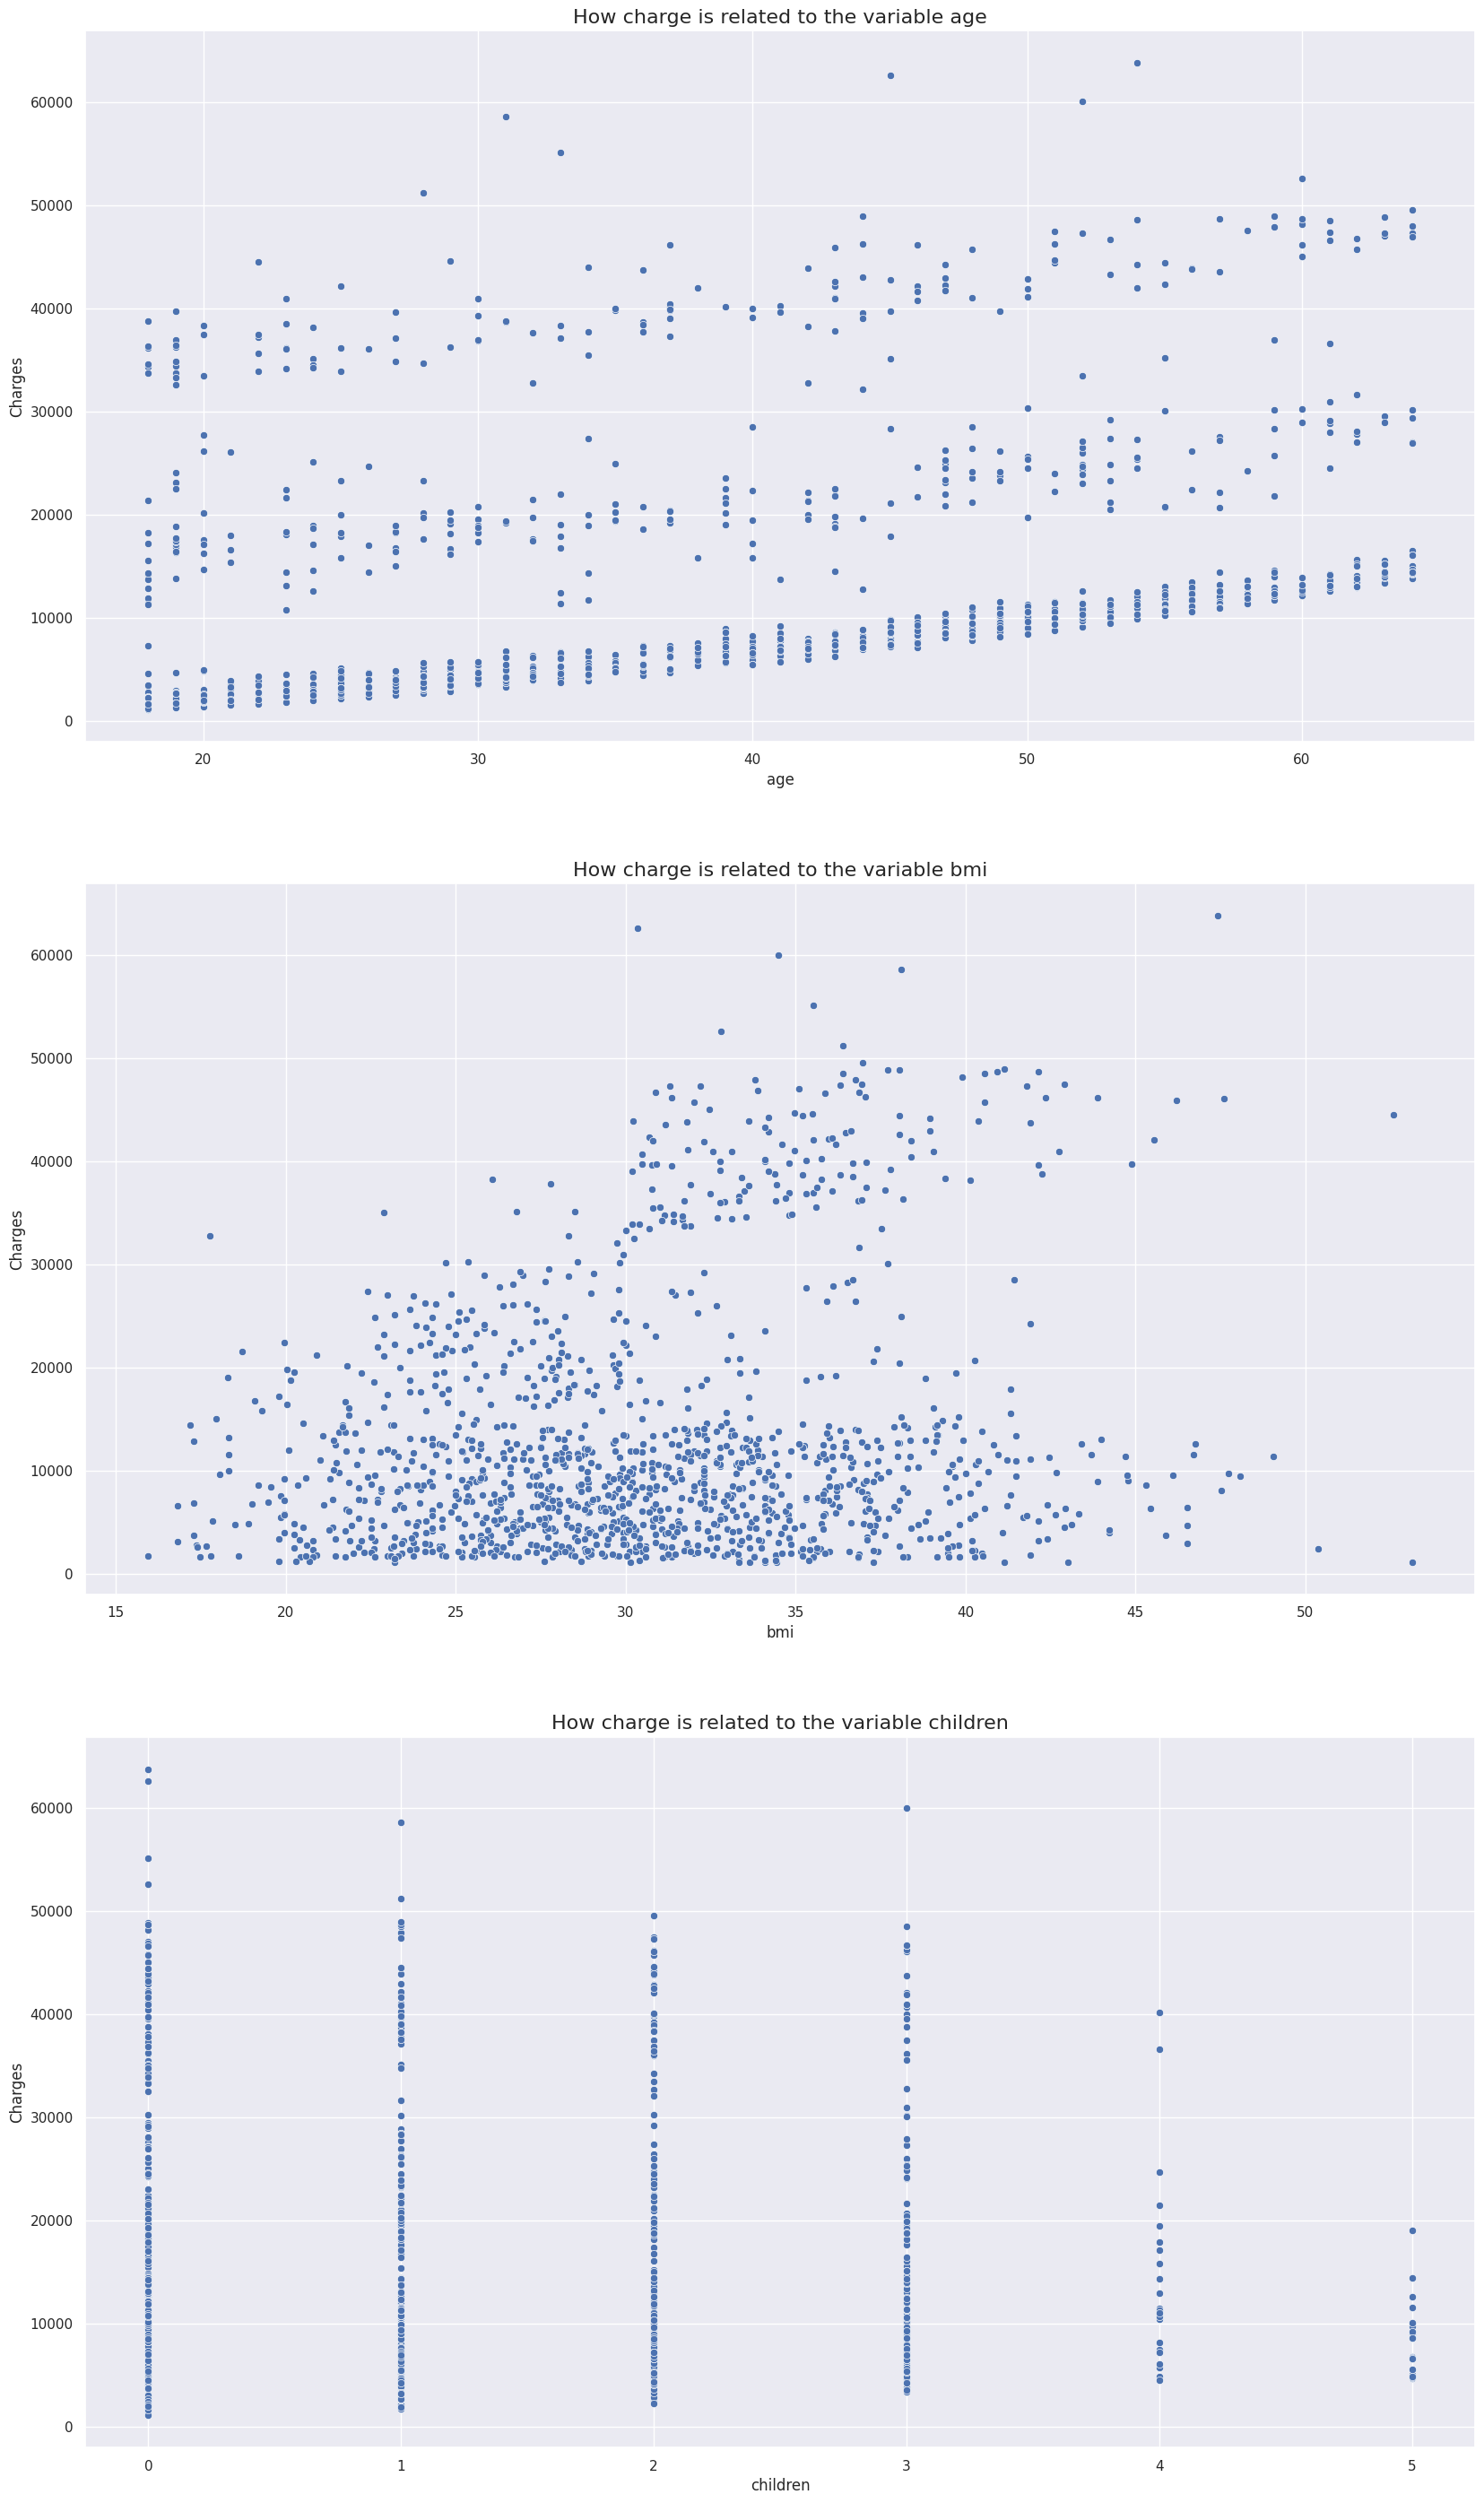

In [265]:
# Variation of charges with all numerical features
num_features = ['age', 'bmi', 'children']
count = 1
plt.subplots(figsize=(20,35))
for feature in num_features:
  plt.subplot(3,1,count)
  sns.scatterplot(data=medical_df, x=feature, y='charges')
  plt.title(f"How charge is related to the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Charges")
  count += 1

### **How charges vary with the categorical features in the dataset:**

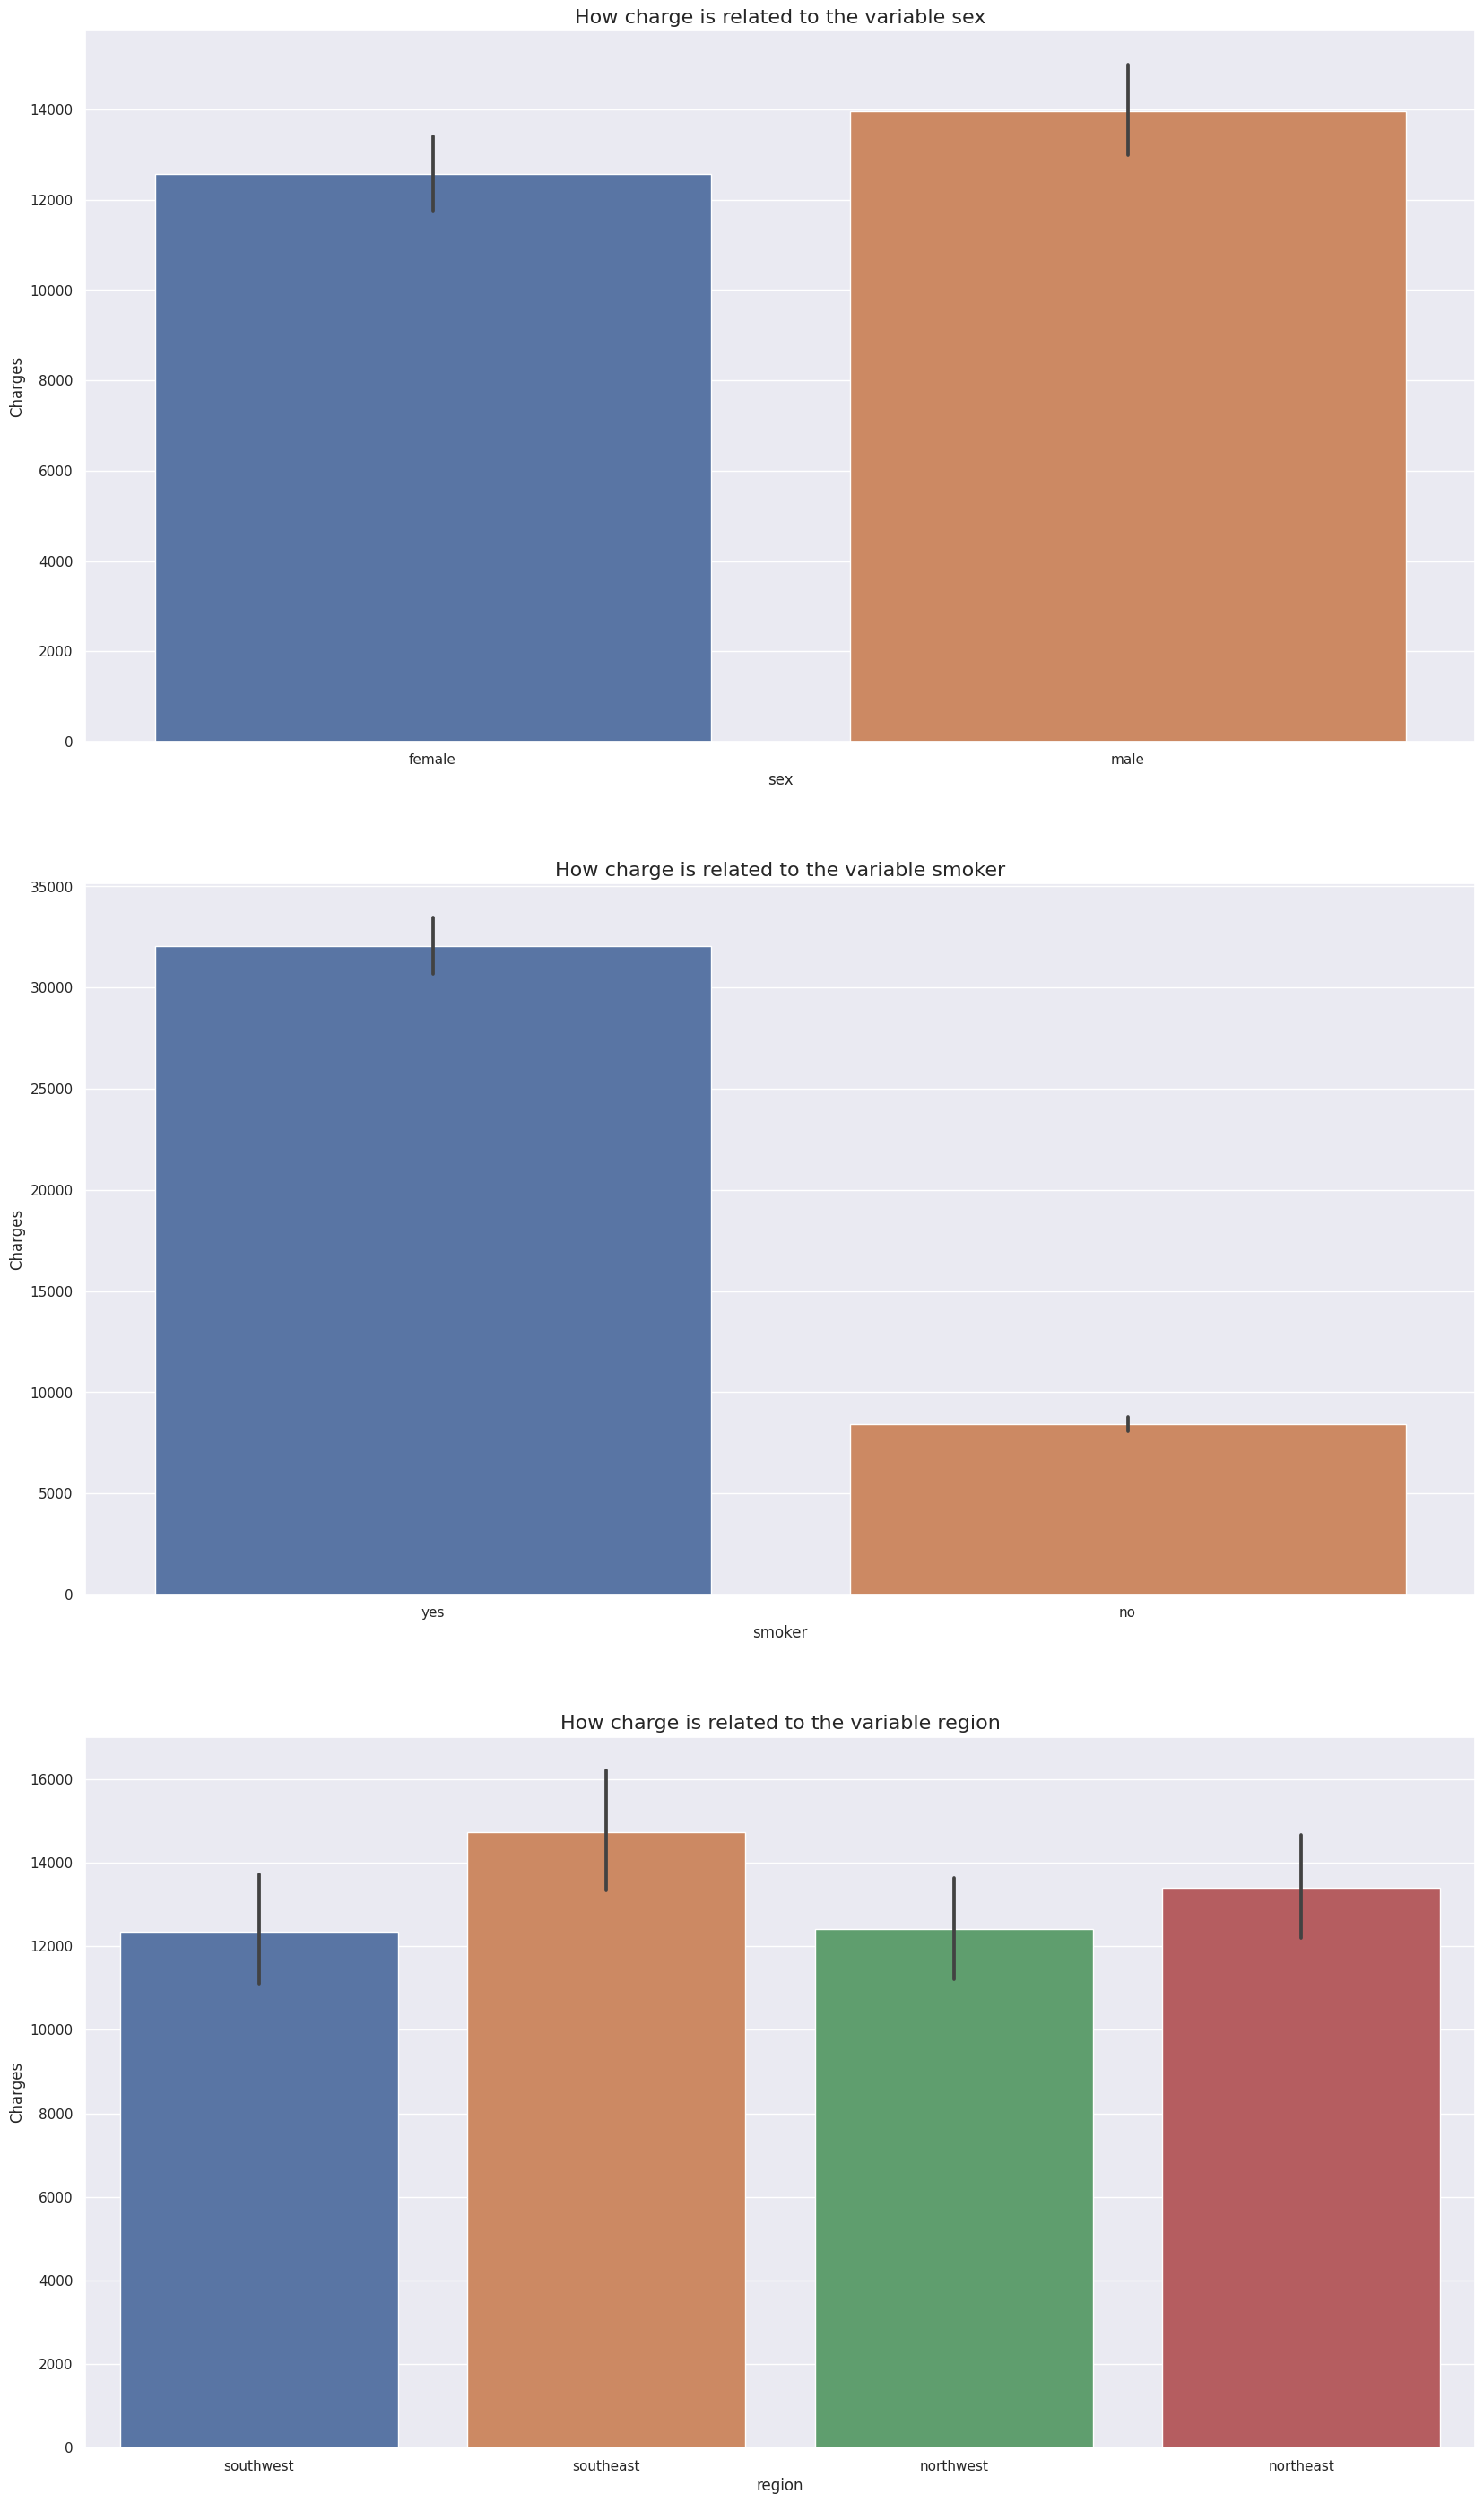

In [266]:
# Variation of charges with all categorical features
cat_features = ['sex', 'smoker', 'region']
count = 1
plt.subplots(figsize=(20,35))
for feature in cat_features:
  plt.subplot(3,1,count)
  sns.barplot(data=medical_df, x=feature, y='charges')
  plt.title(f"How charge is related to the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Charges")
  count += 1

### **How charges vary with smoking in different genders:**

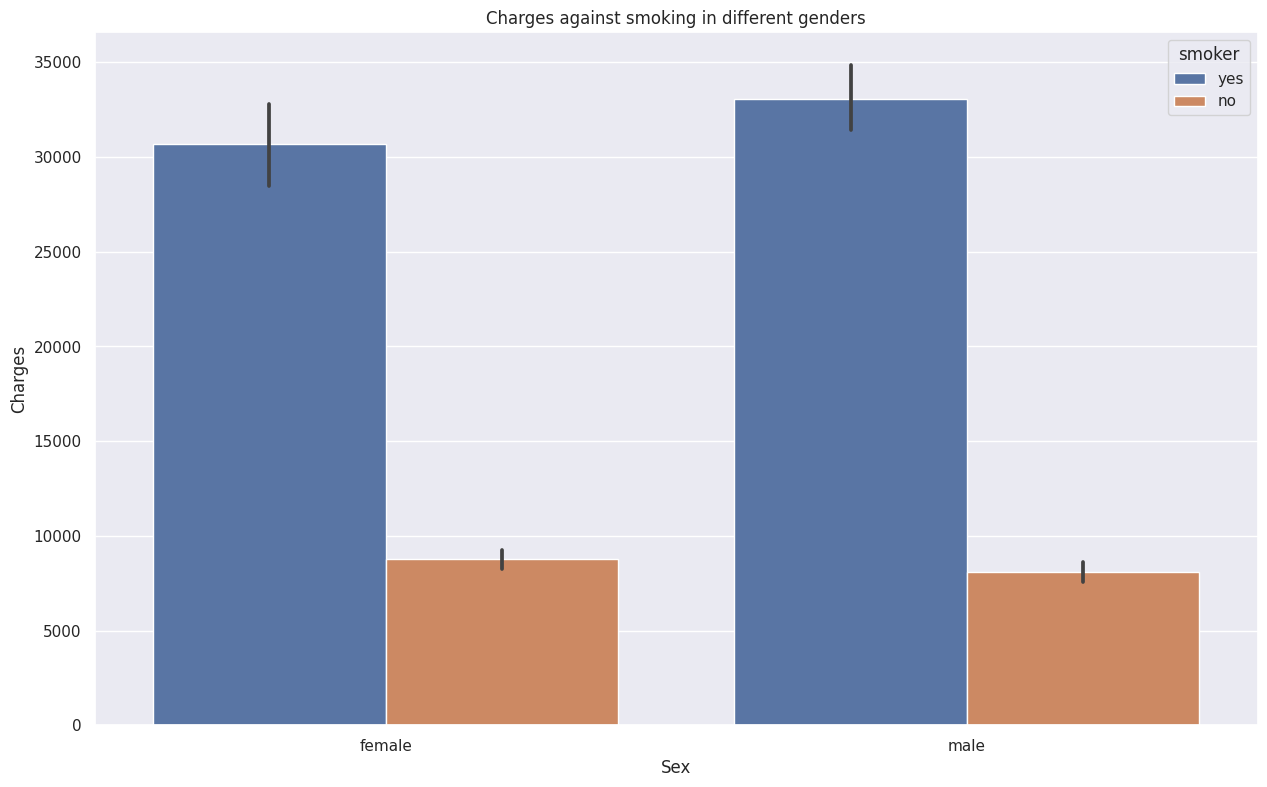

In [267]:
# Charges with smoking in different genders
sns.barplot(data=medical_df, x='sex', y='charges', hue='smoker')
plt.title("Charges against smoking in different genders")
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.show()

## **Feature Selection & Engineering:**

In [268]:
# Print the columns in the dataset
medical_df.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

* We need to drop Id as it is just an unique identifier which won't help in our prediction purpose.
* There are few categorical variables like sex, smoker, region which needs to be encoded into numerical variables.

In [269]:
# Drop the id column
medical_df.drop(['Id'], axis=1, inplace=True)

In [270]:
# One-hot encoding for region
medical_df = pd.get_dummies(medical_df, columns=['region'])
medical_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


In [271]:
# Encode the variables sex and smoker
medical_df['sex'] = medical_df['sex'].map({'male': 0, 'female': 1})
medical_df['smoker'] = medical_df['smoker'].map({'yes':1, 'no': 0})
medical_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


### **Correlation Heatmap:**

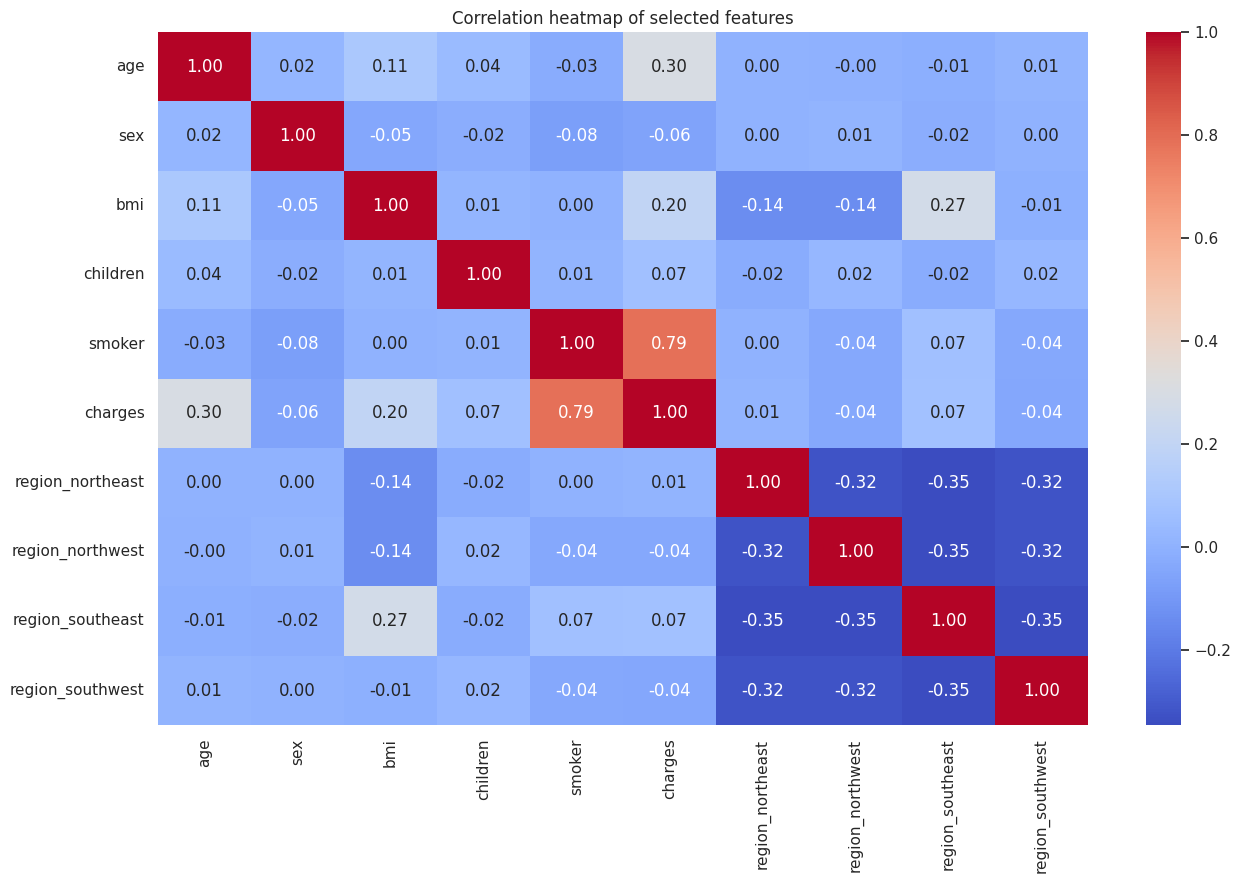

In [272]:
# Calculate the correlation for the independent variables
#independent_features = ['age','sex','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']

subset_df = medical_df

# Create a heatmap
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation heatmap of selected features")
plt.show()

### **How charges is correlated to the independent variables:**

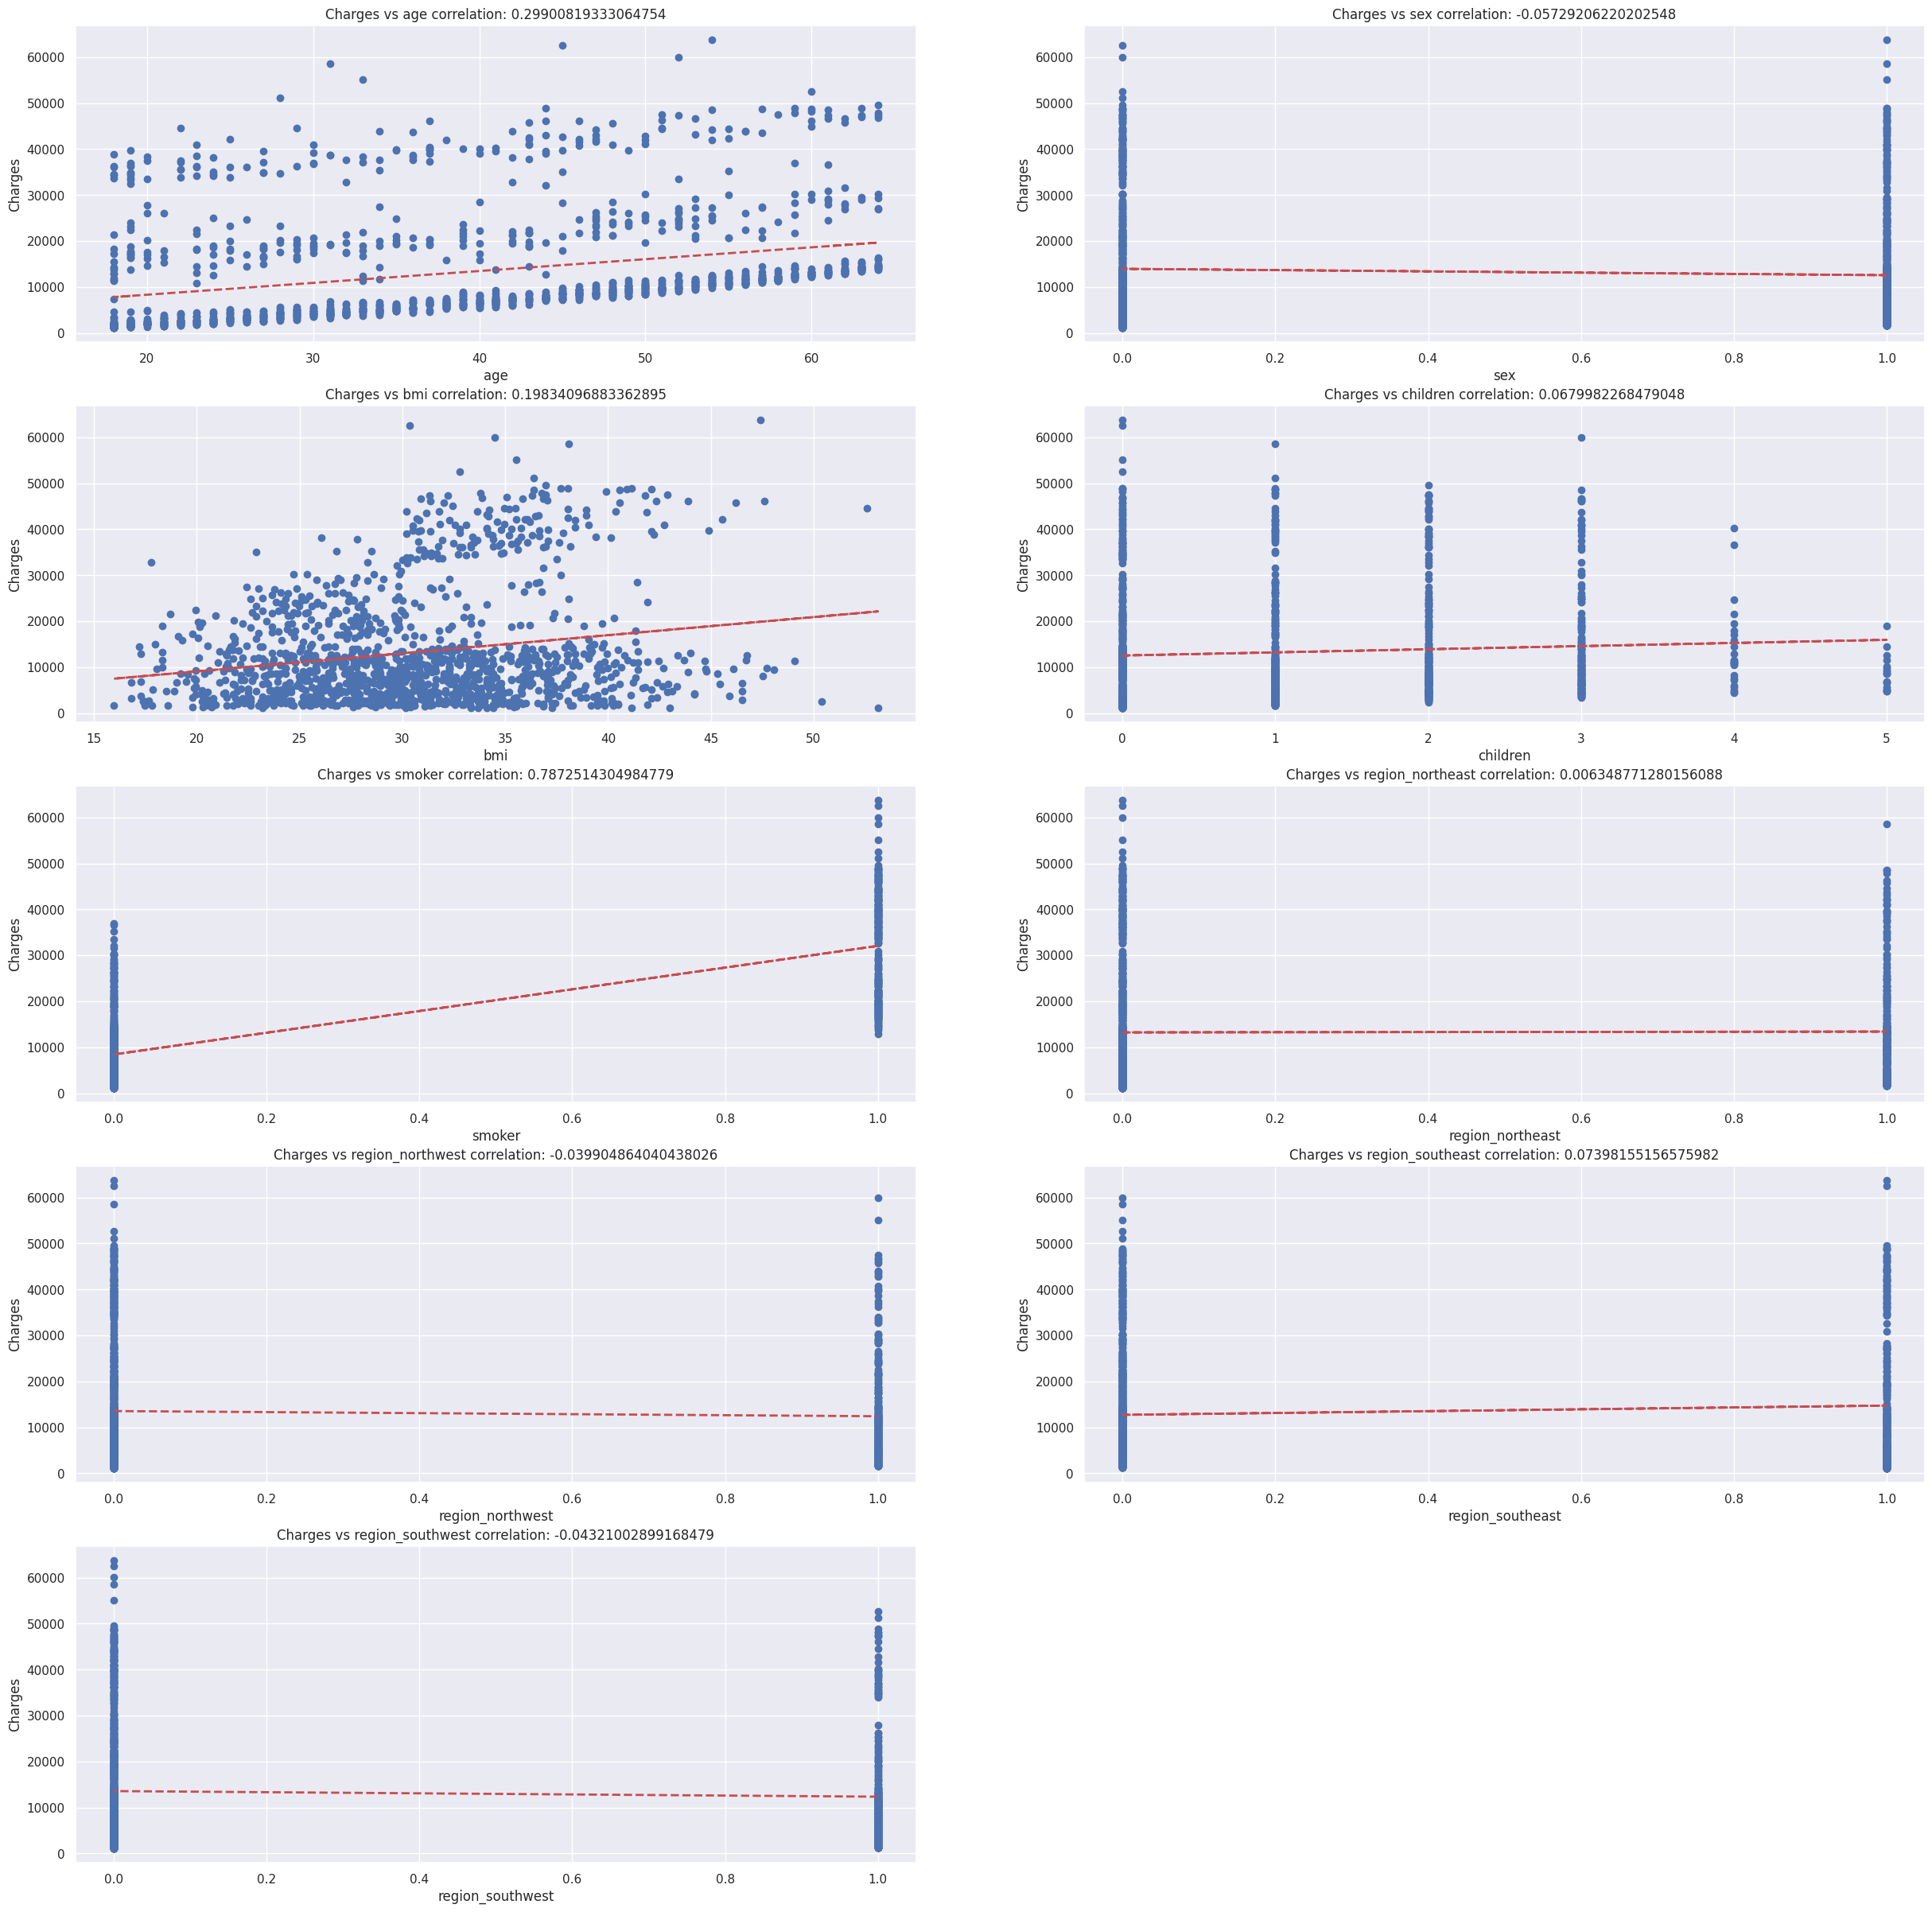

In [273]:
# relation of independent variables with the dependent variable
independent_features = ['age','sex','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']
count = 1
plt.subplots(figsize=(30,30))
for feature in independent_features:
  plt.subplot(5,2,count)
  var = medical_df[feature]
  label = medical_df['charges']
  correlation = var.corr(label)
  plt.scatter(x = var, y = label)
  plt.xlabel(feature)
  plt.ylabel('Charges')
  plt.title(f"Charges vs {feature} correlation: {correlation}")
  z = np.polyfit(var, label, 1)
  y_hat = np.poly1d(z)(medical_df[feature])
  plt.plot(medical_df[feature], y_hat, "r--", lw=2)
  count += 1

### **Checking for Multicollinearity:**

In [274]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [275]:


calc_vif(medical_df[[i for i in medical_df.describe().columns if i not in ['charges']]])

,variables,VIF
0,age,1.016822
1,sex,1.008900
2,bmi,1.106630
3,children,1.004011
4,smoker,1.012074
5,region_northeast,8.810362
6,region_northwest,8.855811
7,region_southeast,11.779149
8,region_southwest,9.436480


## **Model Selection & Training:**

### **Data Preparation**

In [276]:
# Prepare the independent and dependent features
#independent_features = ['age','sex_female','sex_male','bmi','children','region_northeast','region_northwest','region_southeast','region_southwest']
X = medical_df.drop(columns=['charges','region_southeast'])
Y = medical_df['charges']

# Print the shape of X and Y
print("The shape of X is", X.shape)
print("The shape of Y is", Y.shape)

The shape of X is (1338, 8)
The shape of Y is (1338,)


#### **Evaluation Metrics for Regression:**

In [277]:
# func to evaluate metrics
from numpy import math
def print_metrics(actual, predicted):
  MSE = mean_squared_error(actual, predicted)
  RMSE = math.sqrt(mean_squared_error(actual, predicted))
  MAE = mean_absolute_error(actual, predicted)
  R2 = r2_score(actual, predicted)
  Adj_R2 = 1 - (((len(actual) - 1)/(len(actual) - len(independent_features) - 1)) * (1 - r2_score(actual, predicted)))

  print('MSE is {}'.format(MSE))
  print('RMSE is {}'.format(RMSE))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('R2 score is {}'.format(R2))
  print('Adjusted R2 score is {}'.format(Adj_R2))

  return MSE, RMSE, MAE, R2, Adj_R2

#### **Function for plotting actual vs predicted values**

In [278]:
# function for visualizing actual vs predicted values
def visualize_difference(actual, predicted):
  plt.plot(np.array(actual), label='Actual')
  plt.plot(predicted, label='Predicted')
  plt.title("Actual vs Predicted Values")
  plt.xlabel("Test Data")
  plt.ylabel("Price")
  plt.legend()
  plt.show()

### **Building a Linear Regression Model**

In [279]:
def linear_reg(X,Y):
  from scipy.stats import zscore
  X_train = X.apply(zscore)
  Y = np.log10(Y)

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # transforming the data
  #scaler = MinMaxScaler()
  #X_train = scaler.fit_transform(X_train)
  #X_test = scaler.transform(X_test)




  # build a linear regression model
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, Y_train)

  print(lin_reg.score(X_train, Y_train))
  print("\n")
  print("The coefficients are: ", lin_reg.coef_)
  print("The intercept is :", lin_reg.intercept_)
  print("---------------------------------------------------")
  print("\n")

  # predictions after modeling
  Y_train_pred = lin_reg.predict(X_train)
  Y_test_pred = lin_reg.predict(X_test)

  # Evaluating the linear regression model
  print("Train Set Metrics:")
  print("----------------------------------------------")
  print_metrics(Y_train, Y_train_pred)
  print("\n")

  print("Test Set Metrics")
  print("----------------------------------------------")
  metrics = print_metrics(Y_test, Y_test_pred)
  print("\n")
  r2_lr = metrics[3]

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Value': Y_test,
                       'Predicted Value': Y_test_pred})
  print("The top 5 rows of actual vs predicted values\n", pred.head())
  print("\n")

  # visualize actual vs predicted for linear regression
  visualize_difference(Y_test, Y_test_pred)

  return Y_test, Y_test_pred, r2_lr

The shape of training set is (1003, 8) (1003,)
The shape of testing set is (335, 8) (335,)


0.764220434496766


The coefficients are:  [0.01504996 0.03202316 0.00576597 0.04134529 0.67123516 0.06176725
 0.03656667 0.00953996]
The intercept is : 2.9602602218684657
---------------------------------------------------


Train Set Metrics:
----------------------------------------------
MSE is 0.03728690747506682
RMSE is 0.19309818092117498
MAE is 0.12077043031943555
R2 score is 0.764220434496766
Adjusted R2 score is 0.7620834595828394


Test Set Metrics
----------------------------------------------
MSE is 0.036137806347941094
RMSE is 0.19009946435469274
MAE is 0.11883124538852773
R2 score is 0.7782429592887117
Adjusted R2 score is 0.772101995084399


The top 5 rows of actual vs predicted values
       Actual Value  Predicted Value
764       3.958806         3.959148
887       3.721990         3.743743
890       4.467327         4.818301
1293      3.968571         3.961606
259       4.5282

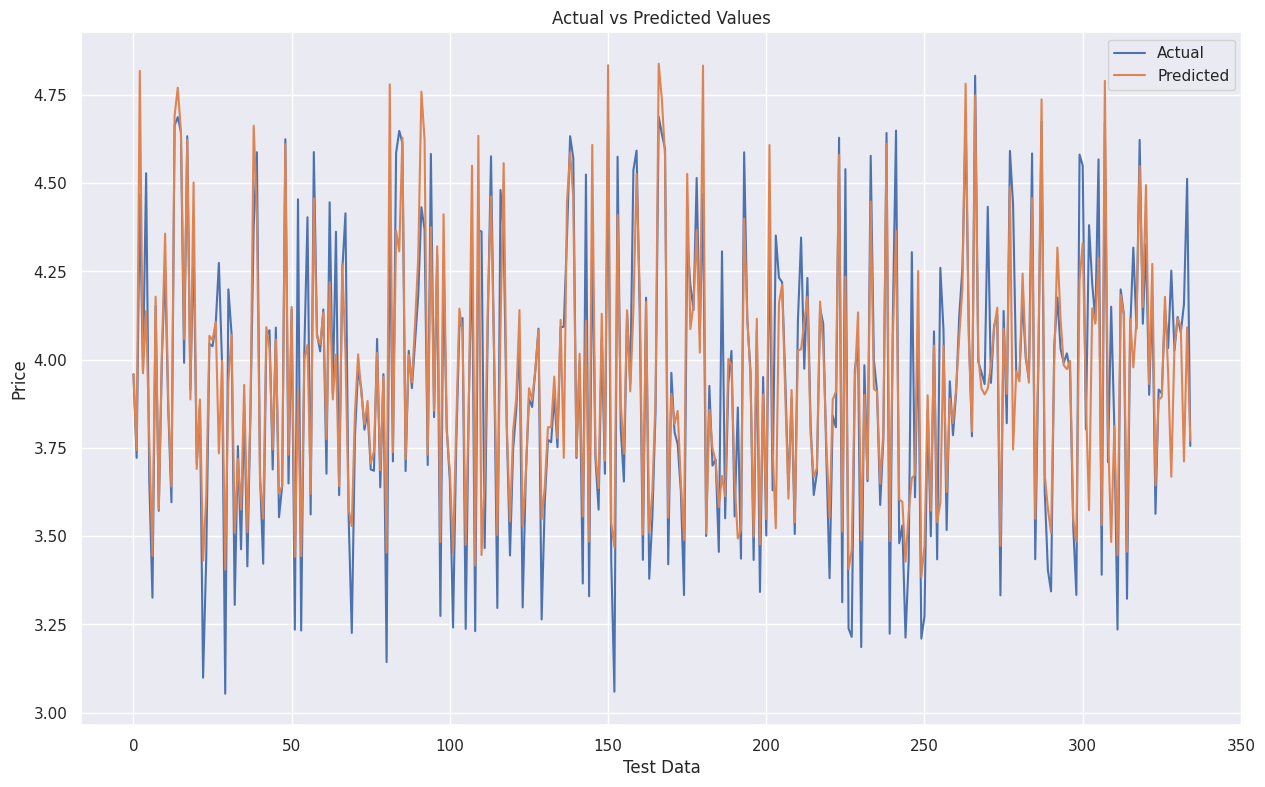

In [280]:
# Run the model
lr = linear_reg(X,Y)

In [281]:
# Save the r2 score
r2_lr = lr[2]
print(r2_lr)

0.7782429592887117


### **Building a Decision Tree Regression Model**

In [282]:
def decision_tree(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'max_depth': [int(x) for x in np.linspace(5,10,5)],
              'min_samples_split': [int(x) for x in np.linspace(5,15,5)],
              'min_samples_leaf': [int(x) for x in np.linspace(1,10,5)],
                'max_features': [int(x) for x in np.linspace(3,9,5)]}

  # build a decision tree model
  dt_model = DecisionTreeRegressor()

  # random search
  dt_grid = RandomizedSearchCV(estimator=dt_model,
                       param_distributions= param_dict,
                       cv = 5, verbose=2, scoring='r2')

  dt_grid.fit(X_train,Y_train)

  print(dt_grid.best_estimator_)
  dt_optimal_model = dt_grid.best_estimator_
  print(dt_grid.best_params_)

  # predictions after modeling
  Y_train_pred = dt_optimal_model.predict(X_train)
  Y_test_pred = dt_optimal_model.predict(X_test)

  # Evaluating the decision tree regression model
  print("Train Set Metrics:")
  print("----------------------------------------------")
  print_metrics(Y_train, Y_train_pred)
  print("\n")

  print("Test Set Metrics")
  print("----------------------------------------------")
  metrics = print_metrics(Y_test, Y_test_pred)
  print("\n")
  r2_dt = metrics[3]

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Value': Y_test,
                       'Predicted Value': Y_test_pred})
  print("The top 5 rows of actual vs predicted values\n", pred.head())


  # calculate the feature importances
  features = X_train.columns
  importances = dt_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return Y_test, Y_test_pred, r2_dt

The shape of training set is (896, 8) (896,)
The shape of testing set is (442, 8) (442,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=9, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=9, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=9, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=9, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=9, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=7; total time=   0.0s
[CV] END max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=7; total time=   0.0s
[CV] END max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=7; total time=   0.0s
[CV] END max_depth=5, max_features=6, min_samples_leaf=1, m

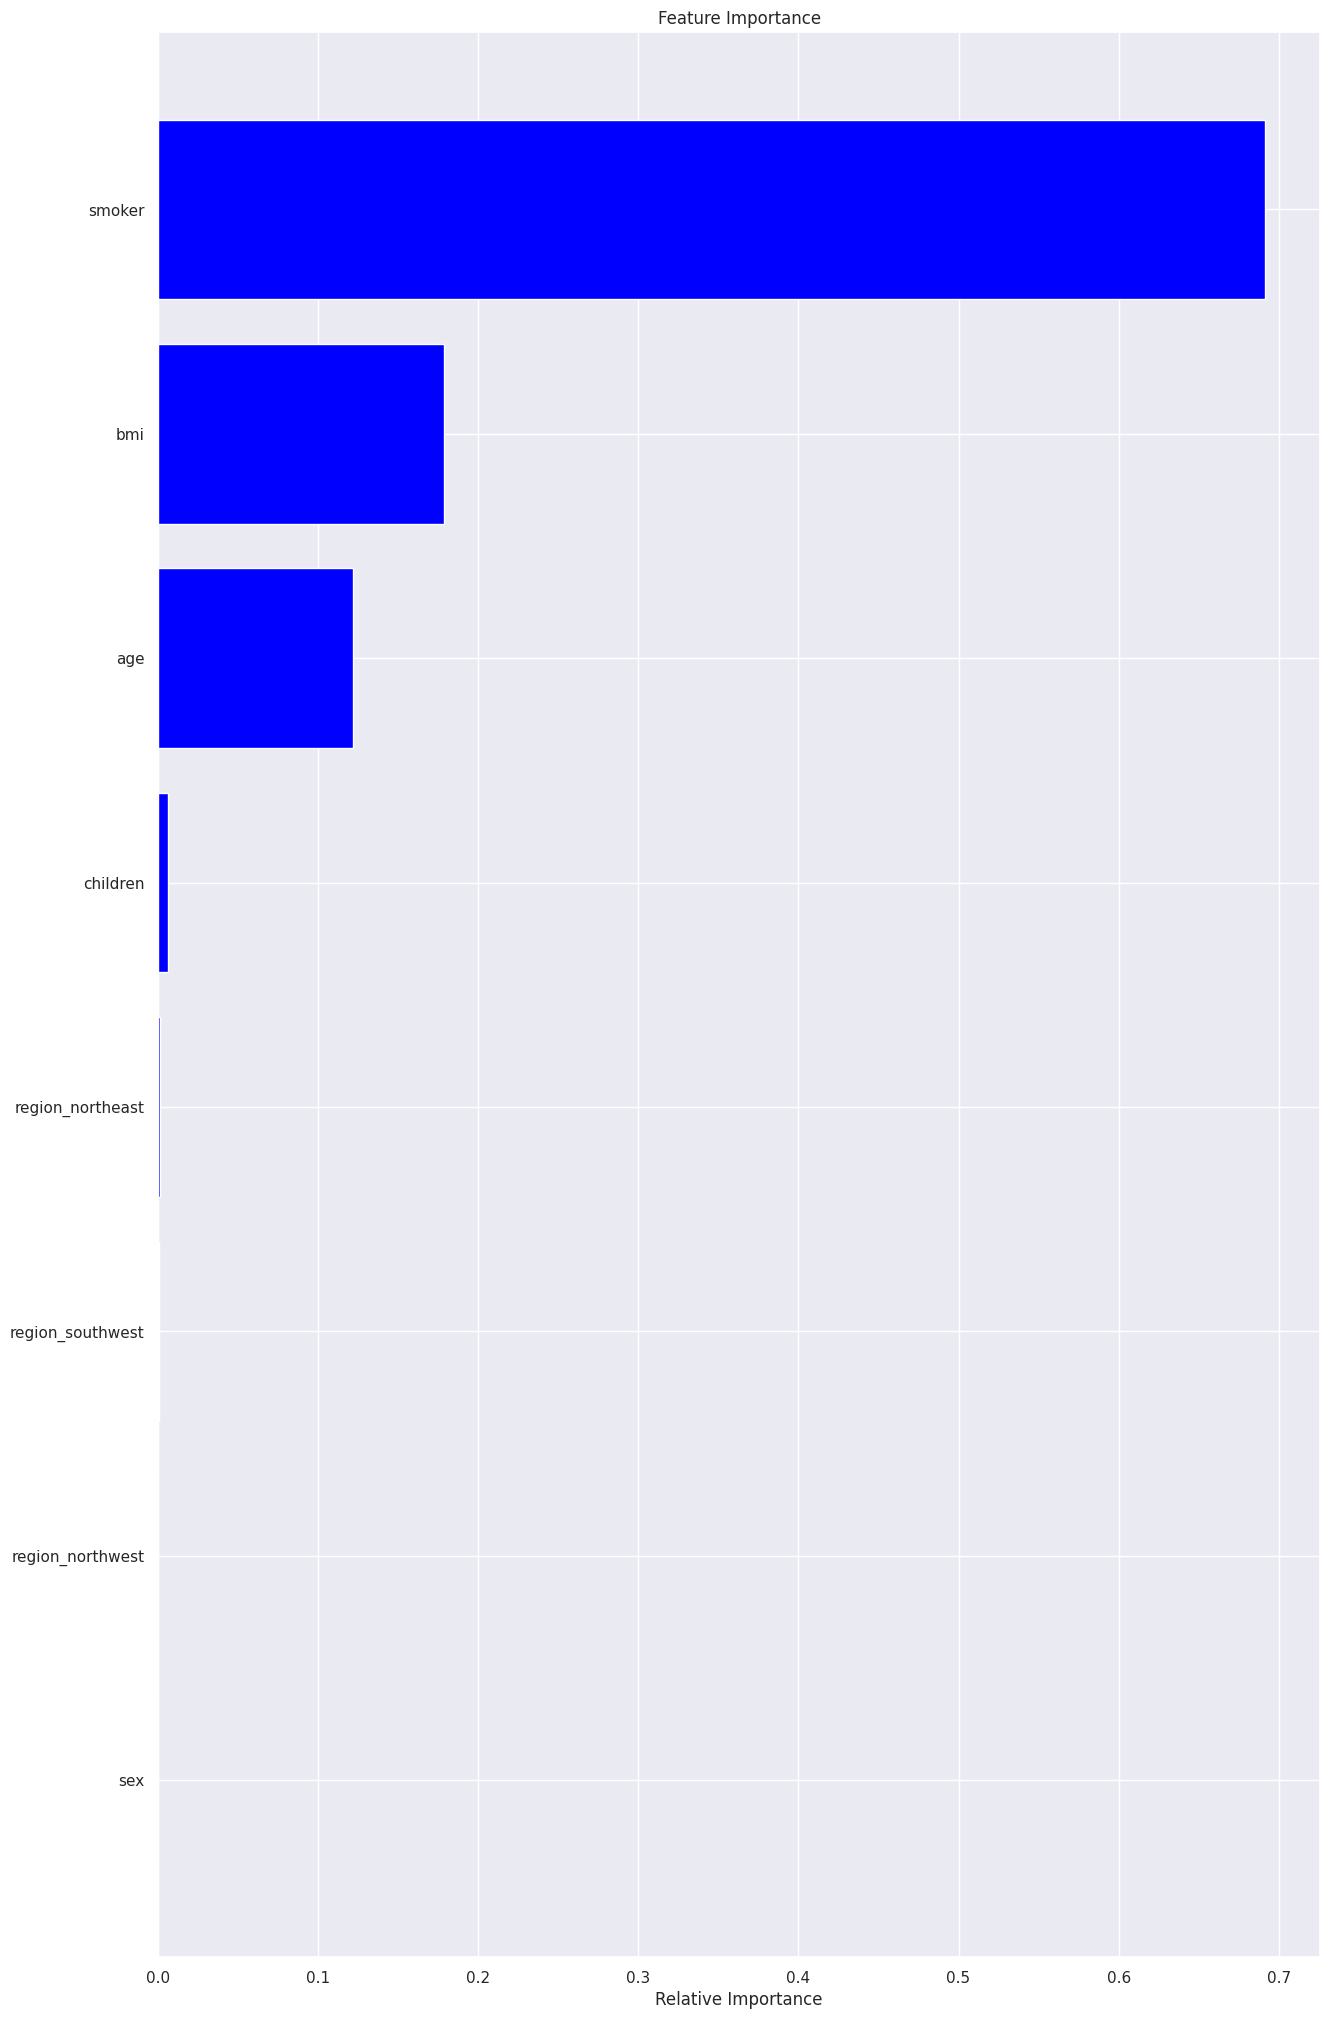

            Feature  Feature Importance
4            smoker                0.69
2               bmi                0.18
0               age                0.12
3          children                0.01
1               sex                0.00
5  region_northeast                0.00
6  region_northwest                0.00
7  region_southwest                0.00


In [283]:
# Run the model
dt = decision_tree(X,Y)

In [284]:
# Save the r2 score
r2_dt = dt[2]
print(r2_dt)

0.8468724122260166


### **Building a Random Forest Regression Model**

In [285]:
def random_forest(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(10,300,100)],
              'max_depth': [int(x) for x in np.linspace(2,10,5)],
              'min_samples_split': [int(x) for x in np.linspace(5,25,10)],
              'min_samples_leaf': [int(x) for x in np.linspace(1,10,5)],
                'max_features': [int(x) for x in np.linspace(3,9,6)]}

  # build a random forest model
  rf_model = RandomForestRegressor()

  # random search
  rf_grid = RandomizedSearchCV(estimator=rf_model,
                       param_distributions= param_dict,
                       cv = 5, verbose=2, scoring='r2')

  rf_grid.fit(X_train,Y_train)

  print(rf_grid.best_estimator_)
  rf_optimal_model = rf_grid.best_estimator_
  print(rf_grid.best_params_)

  # predictions after modeling
  Y_train_pred = rf_optimal_model.predict(X_train)
  Y_test_pred = rf_optimal_model.predict(X_test)

  # Evaluating the random forest regression model
  print("Train Set Metrics:")
  print("----------------------------------------------")
  print_metrics(Y_train, Y_train_pred)
  print("\n")

  print("Test Set Metrics")
  print("----------------------------------------------")
  metrics = print_metrics(Y_test, Y_test_pred)
  print("\n")
  r2_rf = metrics[3]

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Value': Y_test,
                       'Predicted Value': Y_test_pred})
  print("The top 5 rows of actual vs predicted values\n", pred.head())


  # calculate the feature importances
  features = X_train.columns
  importances = rf_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return Y_test, Y_test_pred, r2_rf

The shape of training set is (1003, 8) (1003,)
The shape of testing set is (335, 8) (335,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, max_features=7, min_samples_leaf=3, min_samples_split=18, n_estimators=279; total time=   0.6s
[CV] END max_depth=4, max_features=7, min_samples_leaf=3, min_samples_split=18, n_estimators=279; total time=   0.5s
[CV] END max_depth=4, max_features=7, min_samples_leaf=3, min_samples_split=18, n_estimators=279; total time=   0.5s
[CV] END max_depth=4, max_features=7, min_samples_leaf=3, min_samples_split=18, n_estimators=279; total time=   0.5s
[CV] END max_depth=4, max_features=7, min_samples_leaf=3, min_samples_split=18, n_estimators=279; total time=   0.6s
[CV] END max_depth=10, max_features=6, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, max_features=6, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, max_

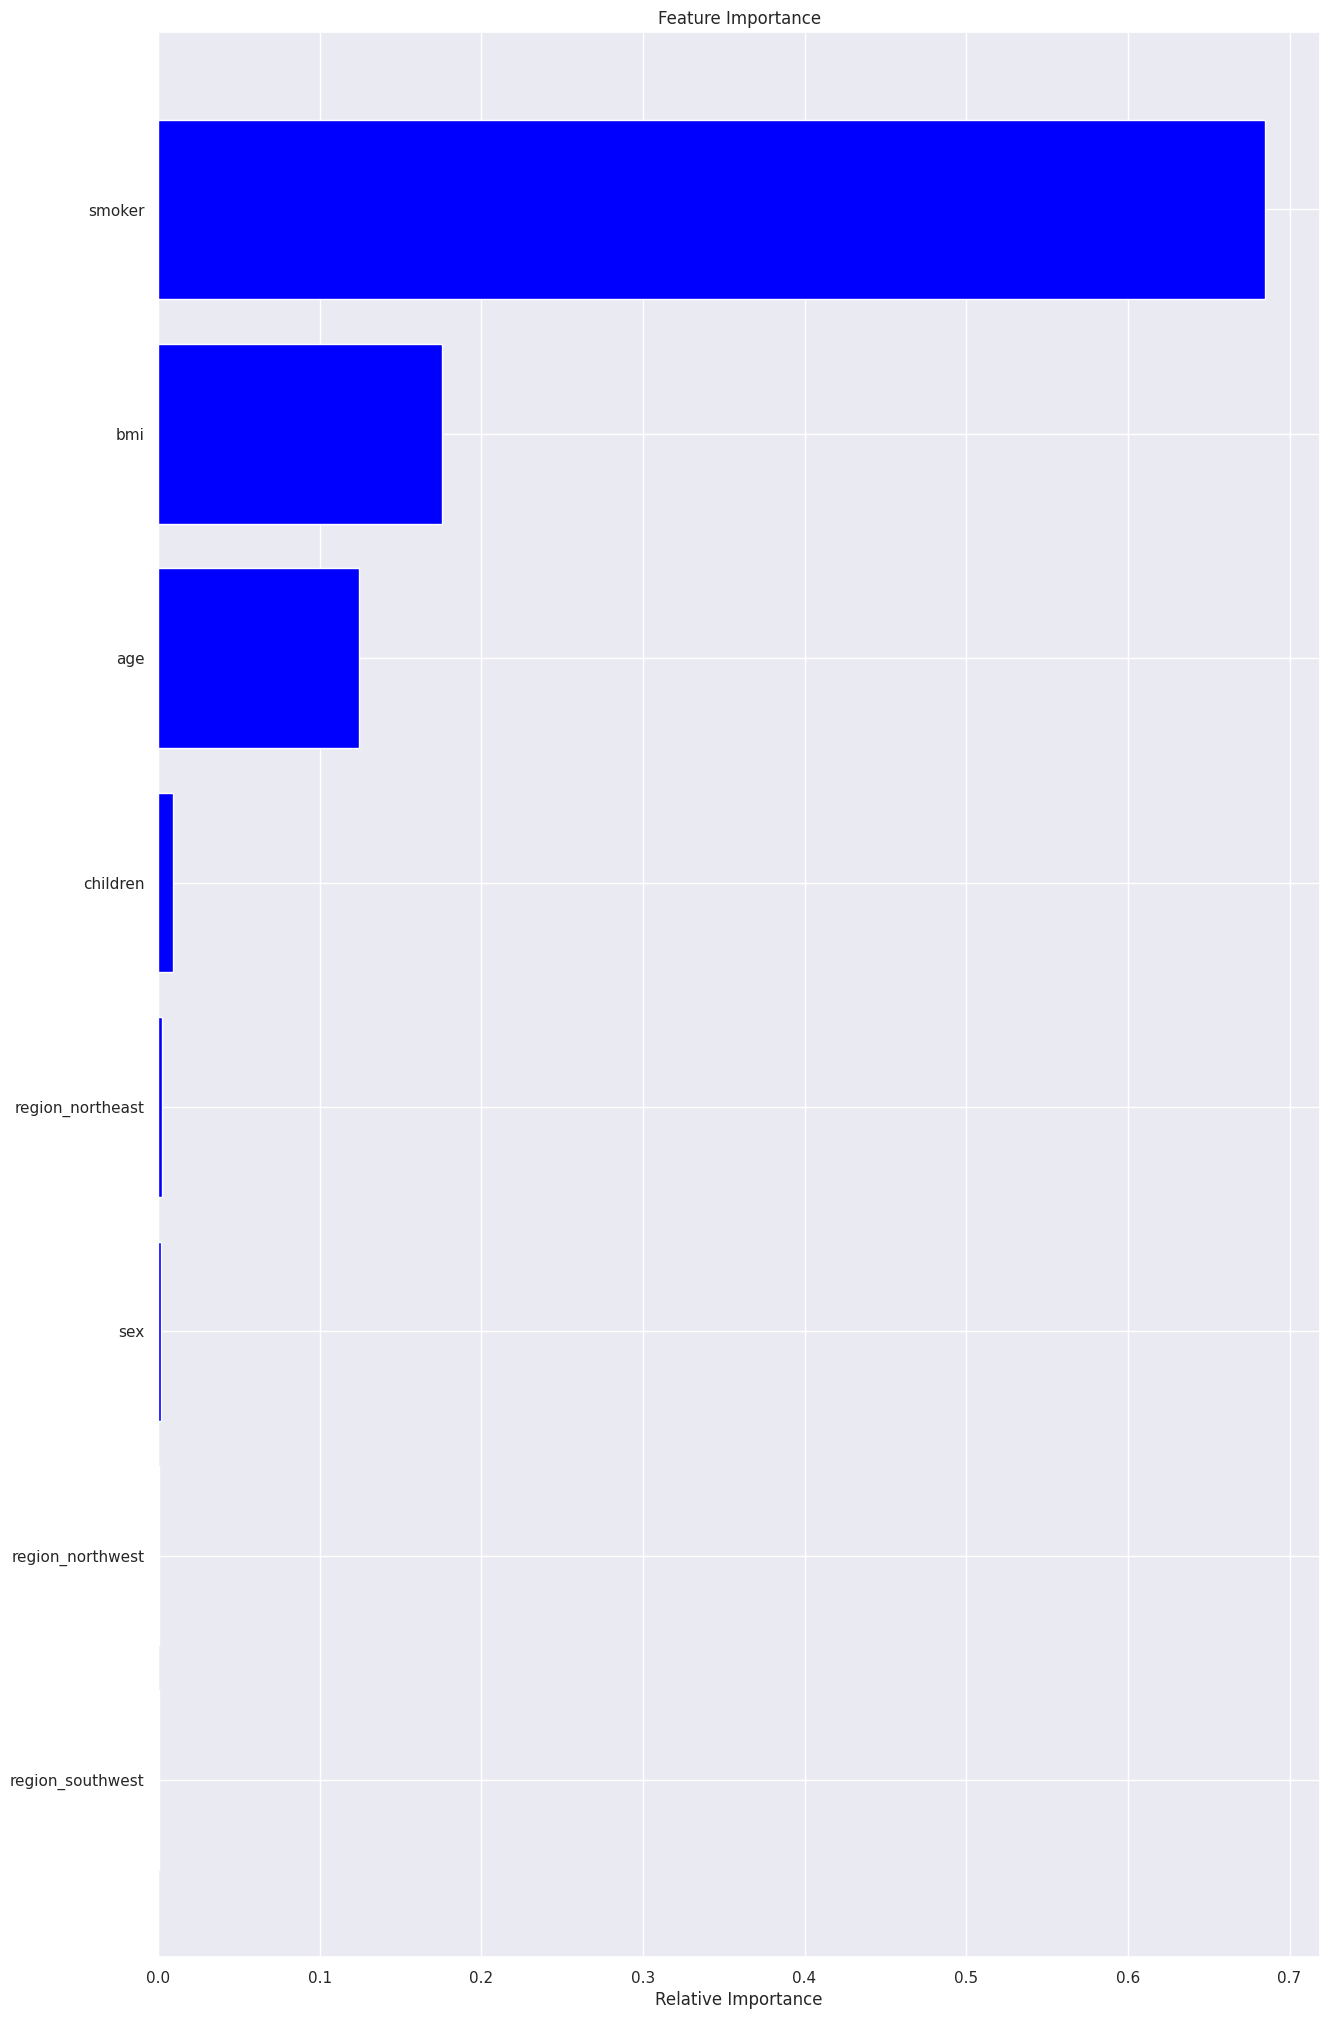

            Feature  Feature Importance
4            smoker                0.68
2               bmi                0.18
0               age                0.12
3          children                0.01
1               sex                0.00
5  region_northeast                0.00
6  region_northwest                0.00
7  region_southwest                0.00


In [286]:
# Run the model
rf = random_forest(X,Y)

In [287]:
# Save the r2 score
r2_rf = rf[2]
print(r2_rf)

0.8662788501820493


### **Building a XGBoost Regression Model**

In [288]:
def XGB(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")


  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(10,300,100)],
                'max_depth': [int(x) for x in np.linspace(5,10,5)],
                'learning_rate': [0.01,0.02,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.5]}

  # build a xgboost model
  xgb_model = XGBRegressor()

  # random search
  xgb_grid = RandomizedSearchCV(estimator=xgb_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='r2')

  xgb_grid.fit(X_train,Y_train)

  print(xgb_grid.best_estimator_)
  xgb_optimal_model = xgb_grid.best_estimator_
  print(xgb_grid.best_params_)
  print("\n")

  # predictions after modeling
  Y_train_pred = xgb_optimal_model.predict(X_train)
  Y_test_pred = xgb_optimal_model.predict(X_test)

  # Evaluating the xgboost regression model
  print("Train Set Metrics:")
  print("----------------------------------------------")
  print_metrics(Y_train, Y_train_pred)
  print("\n")

  print("Test Set Metrics")
  print("----------------------------------------------")
  metrics = print_metrics(Y_test, Y_test_pred)
  print("\n")
  r2_xgb = metrics[3]

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Value': Y_test,
                       'Predicted Value': Y_test_pred})
  print("The top 5 rows of actual vs predicted values\n", pred.head())


  # calculate the feature importances
  features = X_train.columns
  importances = xgb_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return Y_test, Y_test_pred, r2_xgb

The shape of training set is (1003, 8) (1003,)
The shape of testing set is (335, 8) (335,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=118; total time=   0.9s
[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=118; total time=   0.2s
[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=118; total time=   0.2s
[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=118; total time=   0.2s
[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=118; total time=   0.2s
[CV] END ..learning_rate=0.06, max_depth=7, n_estimators=273; total time=   0.3s
[CV] END ..learning_rate=0.06, max_depth=7, n_estimators=273; total time=   0.3s
[CV] END ..learning_rate=0.06, max_depth=7, n_estimators=273; total time=   0.3s
[CV] END ..learning_rate=0.06, max_depth=7, n_estimators=273; total time=   0.3s
[CV] END ..learning_rate=0.06, max_depth=7, n_estimators=273; total time=   0.3s
[CV] END ...learning_rate=0.08, max_

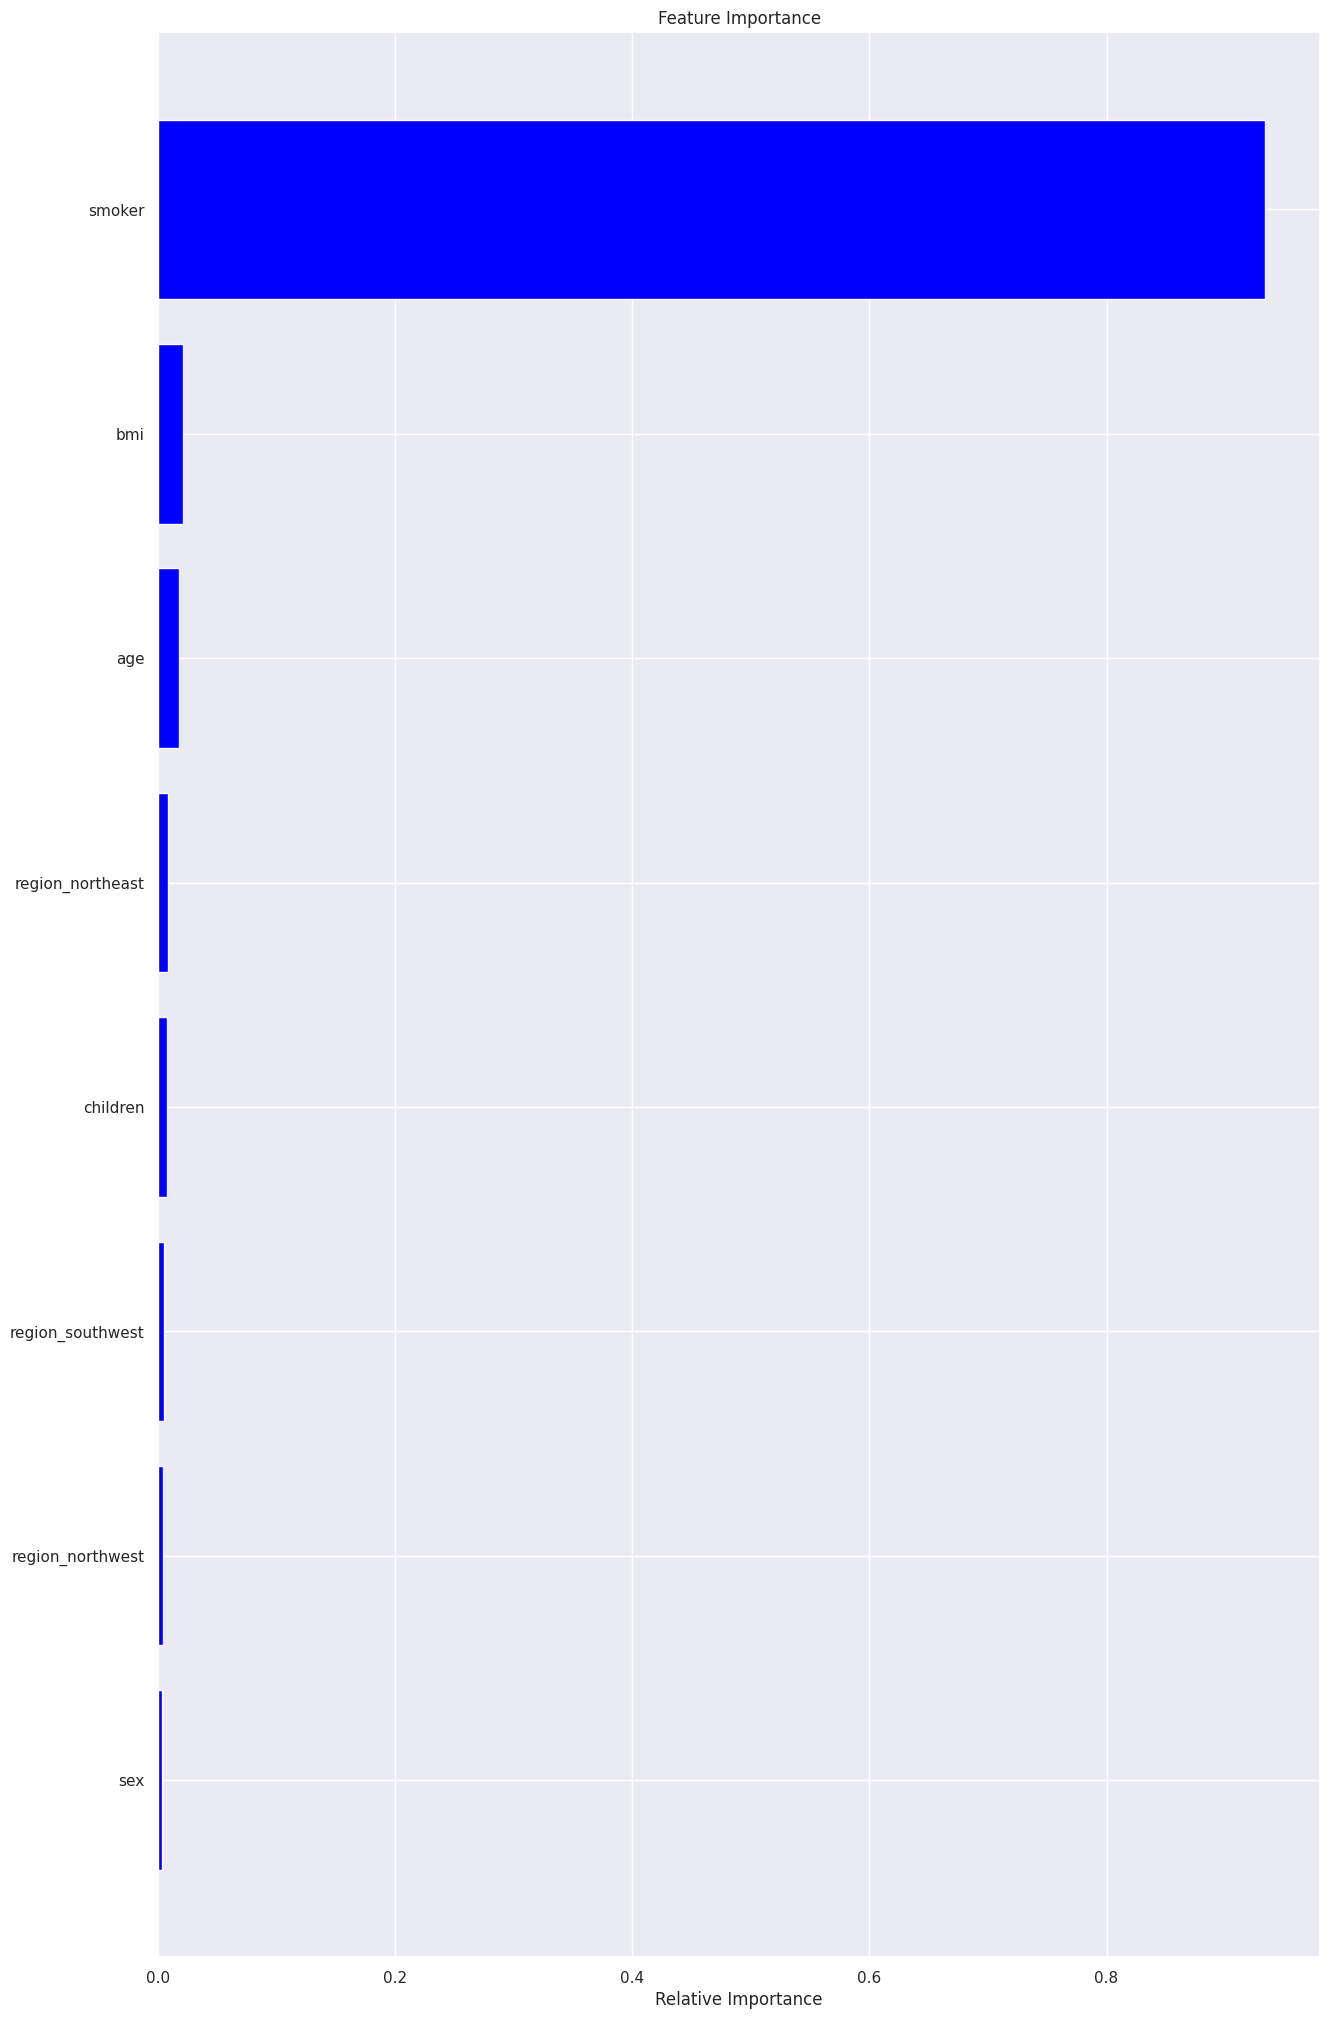

            Feature  Feature Importance
4            smoker                0.93
0               age                0.02
2               bmi                0.02
3          children                0.01
5  region_northeast                0.01
1               sex                0.00
6  region_northwest                0.00
7  region_southwest                0.00


In [289]:
# Run the model
xgb = XGB(X,Y)

In [290]:
# Save the r2 score
r2_xgb = xgb[2]
print(r2_xgb)

0.8440315258346223


### **Building a CatBoost Regression Model:**

In [291]:
# Import Catboost
!pip install catboost
import catboost

In [292]:
# Import the library
from catboost import CatBoostRegressor

In [293]:
def catboost(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")


  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(10,300,100)],
                'max_depth': [int(x) for x in np.linspace(5,10,5)],
                'learning_rate': [0.01,0.02,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.5]}

  # build a catboost model
  cb_model = CatBoostRegressor()

  # random search
  cb_grid = RandomizedSearchCV(estimator=cb_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='r2')

  cb_grid.fit(X_train,Y_train)

  print(cb_grid.best_estimator_)
  cb_optimal_model = cb_grid.best_estimator_
  print(cb_grid.best_params_)
  print("\n")

  # predictions after modeling
  Y_train_pred = cb_optimal_model.predict(X_train)
  Y_test_pred = cb_optimal_model.predict(X_test)

  # Evaluating the catboost regression model
  print("Train Set Metrics:")
  print("----------------------------------------------")
  print_metrics(Y_train, Y_train_pred)
  print("\n")

  print("Test Set Metrics")
  print("----------------------------------------------")
  metrics = print_metrics(Y_test, Y_test_pred)
  print("\n")
  r2_cb = metrics[3]

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Value': Y_test,
                       'Predicted Value': Y_test_pred})
  print("The top 5 rows of actual vs predicted values\n", pred.head())


  # calculate the feature importances
  features = X_train.columns
  importances = cb_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return Y_test, Y_test_pred, r2_cb

Streaming output truncated to the last 5000 lines.
9:	learn: 11377.8732180	total: 62.5ms	remaining: 287ms
10:	learn: 11304.5280247	total: 70.3ms	remaining: 288ms
11:	learn: 11241.5481505	total: 79.3ms	remaining: 291ms
12:	learn: 11160.3012549	total: 96.6ms	remaining: 320ms
13:	learn: 11078.5661410	total: 99.7ms	remaining: 299ms
14:	learn: 11003.5830769	total: 101ms	remaining: 276ms
15:	learn: 10925.6987859	total: 110ms	remaining: 276ms
16:	learn: 10844.3066330	total: 112ms	remaining: 257ms
17:	learn: 10774.4068498	total: 115ms	remaining: 242ms
18:	learn: 10712.2511052	total: 115ms	remaining: 224ms
19:	learn: 10643.2621914	total: 122ms	remaining: 220ms
20:	learn: 10565.6359293	total: 123ms	remaining: 204ms
21:	learn: 10502.8801752	total: 130ms	remaining: 201ms
22:	learn: 10436.7585318	total: 131ms	remaining: 188ms
23:	learn: 10378.4547809	total: 140ms	remaining: 187ms
24:	learn: 10322.1114236	total: 149ms	remaining: 185ms
25:	learn: 10271.2528579	total: 200ms	remaining: 231ms
26:	learn:

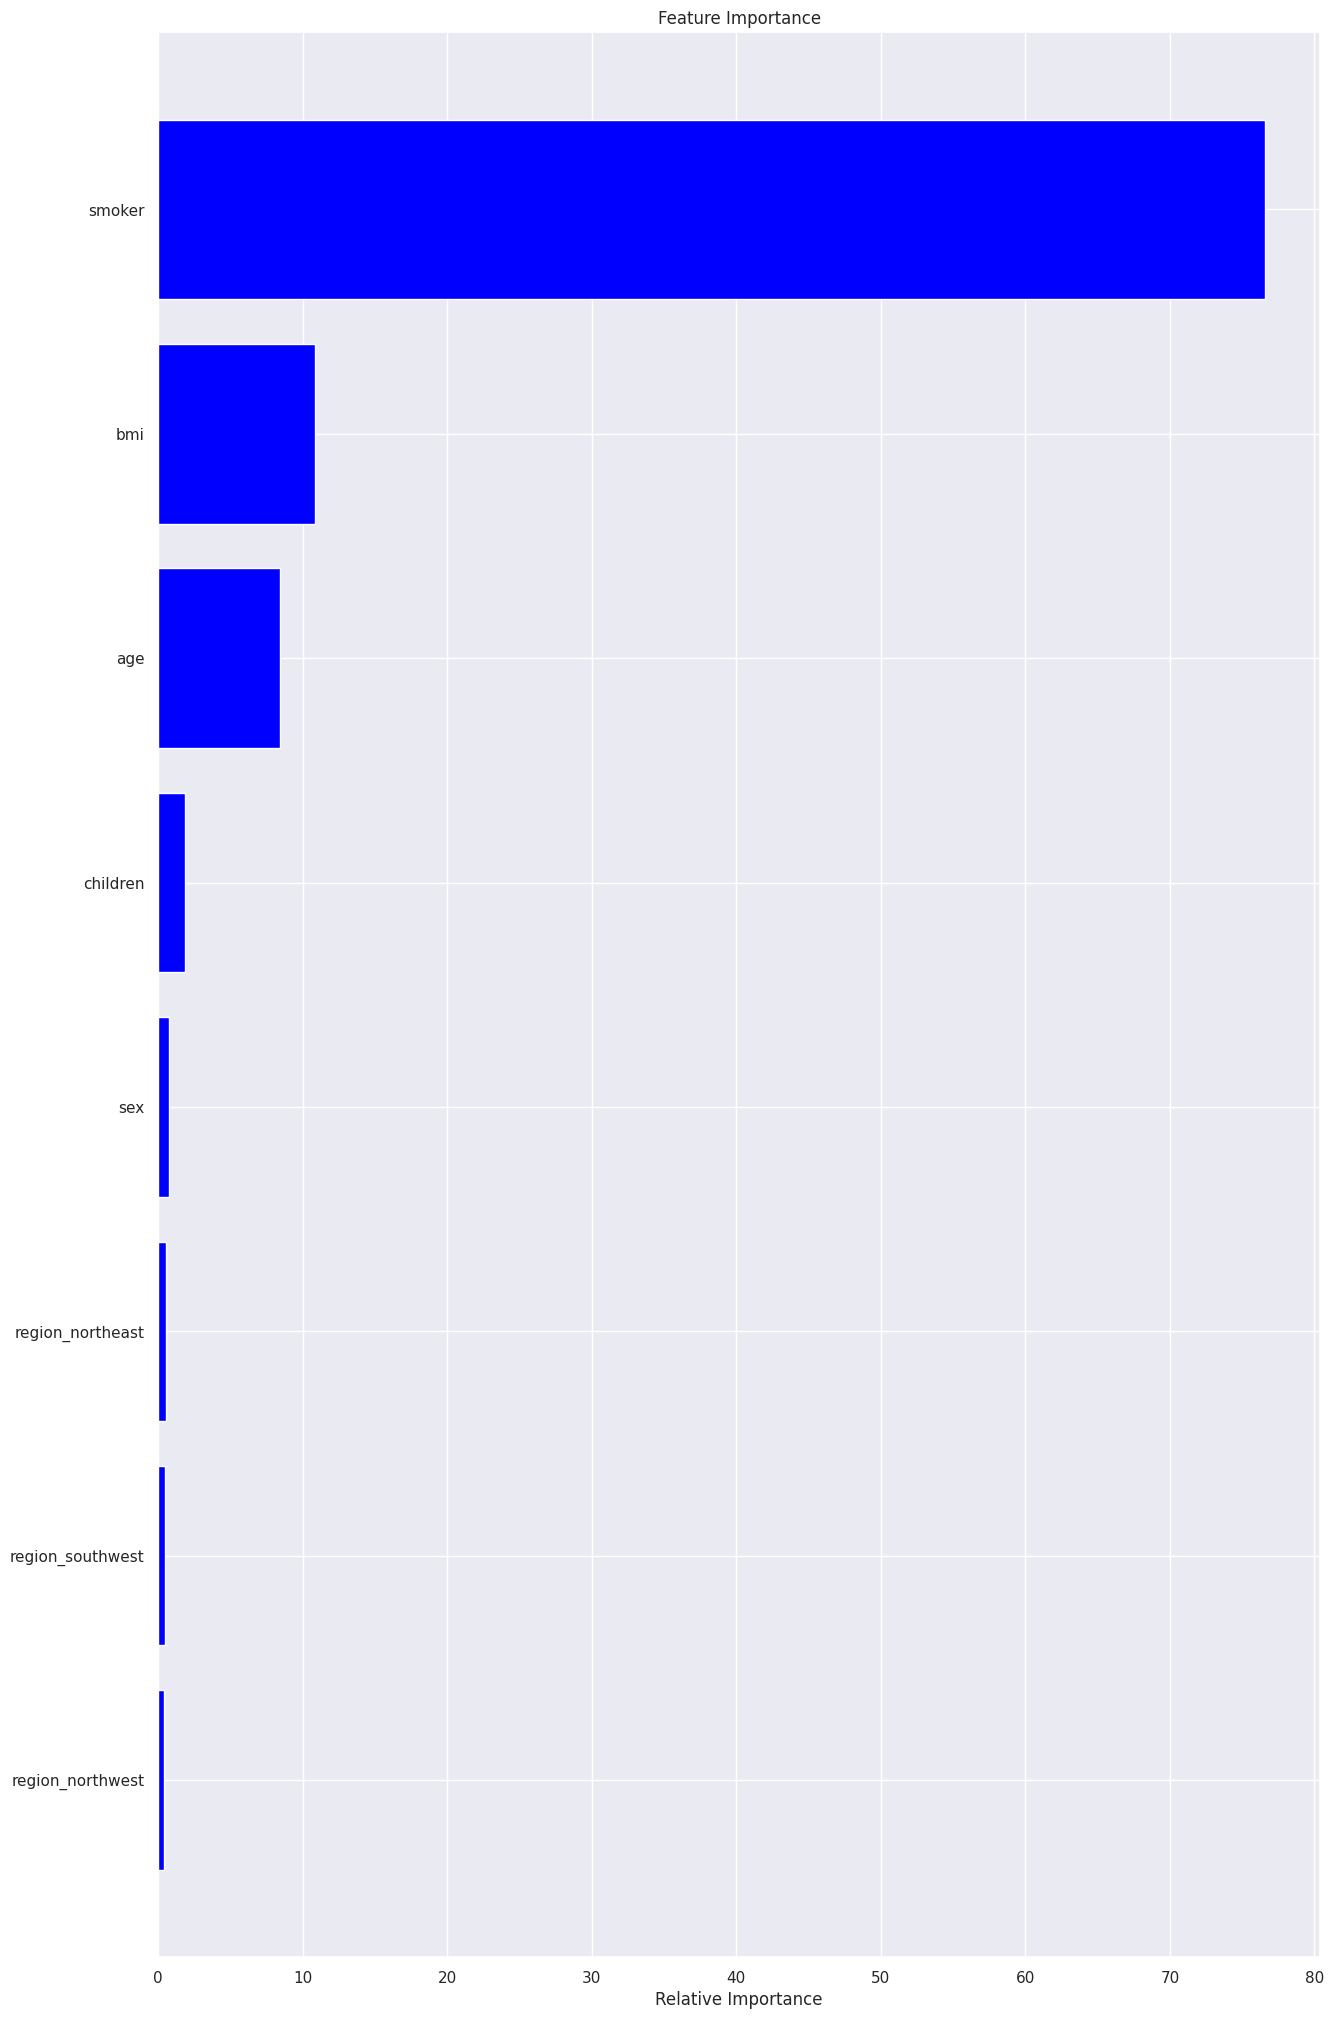

            Feature  Feature Importance
4            smoker               76.59
2               bmi               10.83
0               age                8.44
3          children                1.89
1               sex                0.75
5  region_northeast                0.56
7  region_southwest                0.51
6  region_northwest                0.43


In [294]:
# Run the model
cb = catboost(X,Y)

In [295]:
# Save the r2_score
r2_cb = cb[2]
print(r2_cb)

0.8666832001746766


## **Results:**

### **Comparison of all the models:**

In [296]:
# a dataframe to compare all the models
models_df = pd.DataFrame(
    {'Models': ['Linear Regression','Decision Tree', 'Random Forest','XG Boost','Cat Boost'],
     'R2_Score': [r2_lr, r2_dt, r2_rf, r2_xgb, r2_cb]}
)
models_df.sort_values(by=['R2_Score'], ascending=False, inplace=True)
models_df

,Models,R2_Score
4,Cat Boost,0.866683
2,Random Forest,0.866279
1,Decision Tree,0.846872
3,XG Boost,0.844032
0,Linear Regression,0.778243


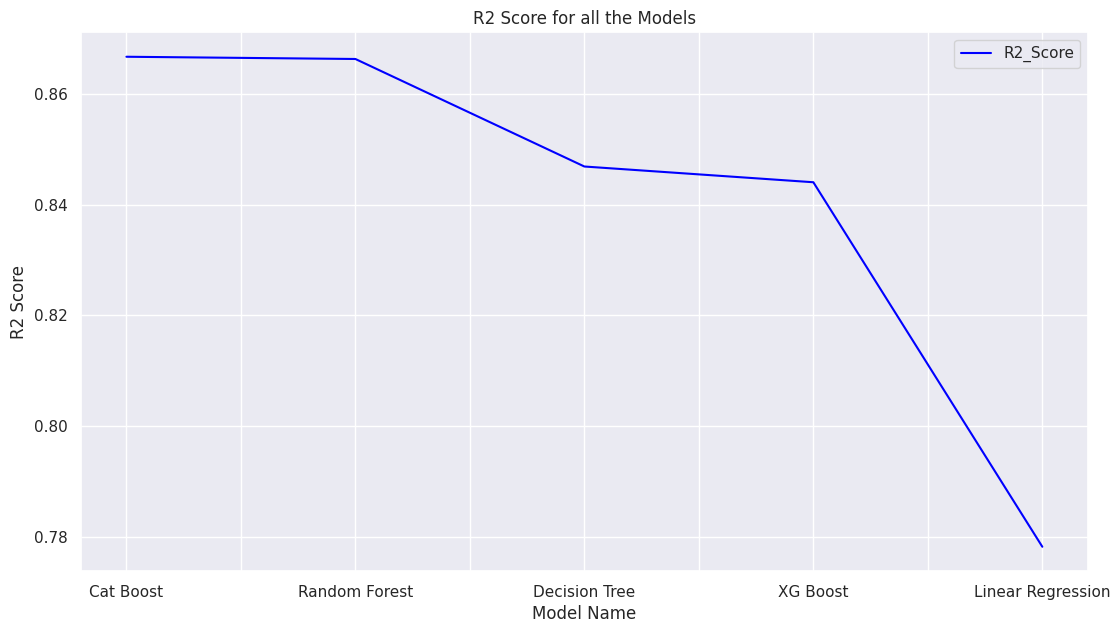

In [297]:
# plot the r2_scpre of all the models
plt.figure(figsize=(13,7))
ax = plt.gca()
models_df.plot(kind='line', x='Models', y='R2_Score', color='blue', ax=ax)
plt.title('R2 Score for all the Models')
plt.xlabel('Model Name')
plt.ylabel('R2 Score')
plt.show()